# Проект: Анализ причин убытков приложения ProcrastinatePRO+


Проведен исследовательский анализ причин убыточности развлекательного приложения Procrastinate Pro+. 
есколько месяцев в привлечение пользователей были вложены деньги, но они не принесли результата. Компания показывает реузльтаты ниже уровня доходности.

В распоряжении есть набор данных о посещении приложения новыми пользователями, в период с 2019-05-01 по 2019-10-27, данные о покупках за этот период, а также информация о рекламных расходах. В рамках исследования будет проведен когортный анализ на предмет пользования приложением, поступление денег от каждого клиента, какие расходы несет компания на привлечение пользователей и их окупаемость

**Инструкция по выполнению проекта:**

Вы - маркетинговый аналитик развлекательного приложения Procrastinate Pro+. Несколько прошлых месяцев ваш бизнес постоянно нес убытки - в привлечение пользователей была вложена куча денег, а толку никакого. Вам нужно разобраться в причинах этой ситуации.

У вас в распоряжении есть лог сервера с данными о посещениях приложения новыми пользователями, зарегистрировавшимися в период с 2019-05-01 по 2019-10-27, выгрузка их покупок за этот период, а также статистика рекламных расходов. Вам предстоит изучить, как люди пользуются продуктом, когда они начинают покупать, сколько денег приносит каждый клиент, когда он окупается и какие факторы отрицательно влияют на привлечение пользователей.

**Шаг 1.** Загрузите данные и подготовьте их к анализу
Загрузите данные о визитах, заказах и расходах в переменные. Оптимизируйте данные для анализа. Убедитесь, что тип данных в каждой колонке — правильный. Путь к файлам:

 -   /datasets/visits_info_short.csv. Скачать датасет
 -   /datasets/orders_info_short.csv. Скачать датасет
 -   /datasets/costs_info_short.csv. Скачать датасет
 
**Шаг 2.** Задайте функции для расчета и анализа LTV, ROI, удержания и конверсии

Разрешается использовать функции, с которыми вы познакомились в теоретических уроках.

**Шаг 3.** Проведите исследовательский анализ данных

Постройте профили пользователей. Определите минимальную и максимальную дату привлечения пользователей.

Выясните:
- Из каких стран приходят посетители? Какие страны дают больше всего платящих пользователей?
- Какими устройствами они пользуются? С каких устройств чаще всего заходят платящие пользователи?
- По каким рекламным каналам шло привлечение пользователей? Какие каналы приносят больше всего платящих пользователей?.

**Шаг 4.** Маркетинг
Выясните:

- Сколько денег потратили? Всего / на каждый источник / по времени
- Сколько в среднем стоило привлечение одного покупателя из каждого источника?

**Шаг 5.** Оцените окупаемость рекламы для привлечения пользователей

С помощью LTV и ROI:
- Проанализируйте общую окупаемость рекламы;
- Проанализируйте окупаемость рекламы с разбивкой по устройствам;
- Проанализируйте окупаемость рекламы с разбивкой по странам;
- Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам.

Опишите проблемы, которые вы обнаружили. Ответьте на вопросы:
- Окупается ли реклама, направленная на привлечение пользователей в целом? 
- Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
- Чем могут быть вызваны проблемы окупаемости? Изучите конверсию и удержание с разбивкой по устройствам, странам, рекламным каналам.

Опишите возможные причины обнаруженных проблем и сформируйте рекомендации для рекламного отдела. При решении этого шага считайте, что вы смотрите данные 1-го ноября 2019 года и что в вашей организации принято считать, что окупаемость должна наступать не позднее, чем через 2 недели после привлечения пользователей.

Подумайте, нужно ли включать в анализ органических пользователей?

**Шаг 6.** Напишите выводы
- Выделите причины неэффективности привлечения пользователей;
- Сформируйте рекомендации для отдела маркетинга для повышения эффективности.



## Загрузка данных и подготовка их к анализу


In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
from scipy import stats as st
from datetime import datetime, timedelta
import pandas as pd
pd.options.display.float_format = "{:,.2f}".format

try:
    visits = pd.read_csv('/datasets/visits_info_short.csv')
    orders = pd.read_csv('/datasets/orders_info_short.csv')
    costs = pd.read_csv('/datasets/costs_info_short.csv')
    
except:
    visits = pd.read_csv('visits_info_short.csv')
    orders = pd.read_csv('orders_info_short.csv')
    costs = pd.read_csv('costs_info_short.csv')
                        
visits.info()
print(visits.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB
        User Id         Region   Device  Channel        Session Start  \
0  981449118918  United States   iPhone  organic  2019-05-01 02:36:01   
1  278965908054  United States   iPhone  organic  2019-05-01 04:46:31   
2  590706206550  United States      Mac  organic  2019-05-01 14:09:25   
3  326433527971  United States  Android   TipTop  2019-05-01 00:29:59   
4  349773784594  United States      Mac  organic  2019-05-01 03:33:35   

           Session End  
0  2019-05-01 02:45:01 

In [2]:
orders.info()
print(orders.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB
        User Id             Event Dt  Revenue
0  188246423999  2019-05-01 23:09:52     4.99
1  174361394180  2019-05-01 12:24:04     4.99
2  529610067795  2019-05-01 11:34:04     4.99
3  319939546352  2019-05-01 15:34:40     4.99
4  366000285810  2019-05-01 13:59:51     4.99


In [3]:
costs.info()
print(costs.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB
           dt   Channel  costs
0  2019-05-01  FaceBoom 113.30
1  2019-05-02  FaceBoom  78.10
2  2019-05-03  FaceBoom  85.80
3  2019-05-04  FaceBoom 136.40
4  2019-05-05  FaceBoom 122.10


Проверим наличие пропусков

In [4]:
display(visits.isna().sum())
display(orders.isna().sum())
costs.isna().sum()

User Id          0
Region           0
Device           0
Channel          0
Session Start    0
Session End      0
dtype: int64

User Id     0
Event Dt    0
Revenue     0
dtype: int64

dt         0
Channel    0
costs      0
dtype: int64

Пропусков в данных нет.
Проверяем дубликаты:

In [5]:
visits.duplicated().sum()

0

In [6]:
orders.duplicated().sum()

0

In [7]:
costs.duplicated().sum()

0

Полных дубликатов не обнаружено

Название некоторых полей датафреймов не корректное. Поправим их:

In [8]:
visits = visits.rename(columns={'User Id': 'user_id', 'Region': 'region', 'Device': 'device', 'Channel': 'channel', 'Session Start': 'session_start', 'Session End': 'session_end'}) 
orders = orders.rename(columns={'User Id': 'user_id', 'Event Dt': 'event_dt', 'Revenue': 'revenue'}) 
costs = costs.rename(columns={'Channel': 'channel'}) 


Проверка:

In [9]:
print(costs.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB
None


Перевод столбцов с указанием даты из строк в дату:

In [10]:
# перевод значений столбцов из строки в дату
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
costs['dt'] = pd.to_datetime(costs['dt']).dt.date 

In [11]:
visits['region'].unique()

array(['United States', 'UK', 'France', 'Germany'], dtype=object)

In [12]:
visits['device'].unique()

array(['iPhone', 'Mac', 'Android', 'PC'], dtype=object)

In [13]:
visits['channel'].unique()

array(['organic', 'TipTop', 'RocketSuperAds', 'YRabbit', 'FaceBoom',
       'MediaTornado', 'AdNonSense', 'LeapBob', 'WahooNetBanner',
       'OppleCreativeMedia', 'lambdaMediaAds'], dtype=object)

**Комментарии по разделу:**

На анализ предоставлены следующие данные:

1. Датасет visits_info_short.csv (информация о посещении сайта) содержит 6 столбцов и 309901 строк записей

2. Датасет orders_info_short (информация о заказах) - 3 столбца и 40212 строк

3. Датасет costs_info_short.csv (информация о затратах на маркетинг) - 3 столбца и 1800 строк

Названия столбцов датасетов имеют заглавные буквы и пробелы. Для удобства обработки данных заглавные исправлены на строчные, пропуски заменены нижним подчеркиванием. Формат значения стоблцов с информацией о датах исправлены со строк на datetime. Пропусков и дубликатов во всех трех датасетах не обнаружено.

Развлекательным приложением, в период 2019-05-01 по 2019-10-27, пользовались жители США, Великобритании, Франции и Германии, которые заходили в приложение с мобильных устройств iPhone и Android, а также с компьютеров Мас и РС.  

Количество рекламных источников - 10 (не считая "organic")

## Строим функции для расчета и анализа LTV, ROI, удержания и конверсии

Функция LTV и ROI:

In [14]:
def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    ) 

Функция удержания:

In [15]:
def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

Функция для расчёта конверсии:

In [16]:
def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis=1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

**Комментарии по разделу:**

В целях проведения последующих расчетов и анализа созданы следующие функции: LTV (Lifetime Value), ROI (Return On Investment), Retention Rate (коэффициент удержания) и Conversion Rate (коэффициент конверсии).



# Шаг 3. Проведём исследовательский анализ данных



Строим профили пользователей:

In [17]:
# функция для создания пользовательских профилей
def get_profiles(visits, orders, costs):

    # сортируем сессии по ID пользователя и дате посещения
    # группируем по ID и находим первые значения session_start, channel, region and device
    # столбец с временем первого посещения назовём first_ts
    # от англ. first timestamp — первая временная отметка
    profiles = (
        visits.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg({'session_start': 'first', 'channel': 'first', 'region': 'first', 'device': 'first'})
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()  
    )

    # определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    # эти данные понадобятся для когортного анализа
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())
    
    # считаем количество уникальных пользователей с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )
    
    # объединяем траты на рекламу и число привлечённых пользователей
    costs = costs.merge(new_users, on=['dt', 'channel'], how='left')
    
    # делим рекламные расходы на число привлечённых пользователей
    costs['acquisition_cost'] = costs['costs'] / costs['unique_users']
 

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)
    
    
    
    return profiles

In [18]:
profiles = get_profiles(visits, orders, costs)
profiles

user_id            first_ts       channel         region  device  \
0             599326 2019-05-07 20:58:57      FaceBoom  United States     Mac   
1            4919697 2019-07-09 12:46:07      FaceBoom  United States  iPhone   
2            6085896 2019-10-01 09:58:33       organic         France  iPhone   
3           22593348 2019-08-22 21:35:48    AdNonSense        Germany      PC   
4           31989216 2019-10-02 00:07:44       YRabbit  United States  iPhone   
...              ...                 ...           ...            ...     ...   
150003  999956196527 2019-09-28 08:33:02        TipTop  United States  iPhone   
150004  999975439887 2019-10-21 00:35:17       organic             UK      PC   
150005  999976332130 2019-07-23 02:57:06        TipTop  United States  iPhone   
150006  999979924135 2019-09-28 21:28:09  MediaTornado  United States      PC   
150007  999999563947 2019-10-18 19:57:25       organic  United States  iPhone   

                dt      month  payer  acquisition_cost  
0       2019-05-07 2019-05-01   True              1.09  
1       2019-07-09 2019-07-01  False              1.11  
2       2019-10-01 2019-10-01  False              0.00  
3       2019-08-22 2019-08-01  False              0.99  
4       2019-10-02 2019-10-01  False              0.23  
...            ...        ...    ...               ...  
150003  2019-09-28 2019-09-01  False              3.50  
150004  2019-10-21 2019-10-01  False              0.00  
150005  2019-07-23 2019-07-01  False              2.60  
150006  2019-09-28 2019-09-01  False              0.21  
150007  2019-10-18 2019-10-01  False              0.00  

[150008 rows x 9 columns]

Результат — 150008 пользовательских профилей... **(См.Профиль пользователя. Функции first() и last().)**

**Определите минимальную и максимальную даты привлечения пользователей.**

Определим момент анализа:


In [19]:
observation_date = datetime(2019, 11, 1).date()
observation_date

datetime.date(2019, 11, 1)

Горизонт анализа:

In [20]:
horizon_days = 14

Опция «игнорировать горизонт»:

In [21]:
ignore_horizon = False

Минимальная дата привлечения пользователей:

In [22]:
min_analysis_date = profiles['dt'].min()
print(min_analysis_date)

2019-05-01


## EDA

Максимально возможная дата привлечения с учётом горизонта:

In [23]:
max_analysis_date = observation_date - timedelta(days=horizon_days - 1)
max_analysis_date

datetime.date(2019, 10, 19)

Распределение пользователей по странам:

In [24]:
# страны и платящие пользователи
region = profiles.groupby('region').agg({'user_id': 'nunique', 'payer': 'sum'}).sort_values(by='payer', ascending=False)
region['users_total_share, %'] = round(region['user_id'] / region['user_id'].sum() * 100, 1)
region['payers_total_share, %'] = round(region['payer'] / region['payer'].sum() * 100, 1)
region['share, %'] = round(region['payer'] / region['user_id'] * 100, 1)
region

user_id  payer  users_total_share, %  payers_total_share, %  \
region                                                                       
United States   100002   6902                 66.70                  77.70   
UK               17575    700                 11.70                   7.90   
France           17450    663                 11.60                   7.50   
Germany          14981    616                 10.00                   6.90   

               share, %  
region                   
United States      6.90  
UK                 4.00  
France             3.80  
Germany            4.10

Совокупное количество пользователей:

In [25]:
region['user_id'].sum()

150008

Из них пользователей производящих оплату и их доля от общего количества пользователей:

In [26]:
print(region['payer'].sum())
print('Доля пользователей производящих оплату:', round((region['payer'].sum() / region['user_id'].sum() * 100), 1))

8881
Доля пользователей производящих оплату: 5.9


Устройства, с которых заходят в приложение:

In [27]:
# устройства и платящие пользователи
device = profiles.groupby('device').agg({'user_id': 'nunique', 'payer': 'sum'}).sort_values(by='payer', ascending=False)
device['share, %'] = round(device.payer / device.user_id * 100, 2)
device

user_id  payer  share, %
device                           
iPhone     54479   3382      6.21
Android    35032   2050      5.85
Mac        30042   1912      6.36
PC         30455   1537      5.05

Привлечение пользователей через рекламные каналы: 

In [28]:
# каналы и платящие пользователи
channel = profiles.groupby('channel').agg({'user_id': 'nunique', 'payer': 'sum'}).sort_values(by='user_id', ascending=False)
channel['share'] = round(channel.payer / channel.user_id, 2)
channel

user_id  payer  share
channel                                  
organic               56439   1160   0.02
FaceBoom              29144   3557   0.12
TipTop                19561   1878   0.10
OppleCreativeMedia     8605    233   0.03
LeapBob                8553    262   0.03
WahooNetBanner         8553    453   0.05
RocketSuperAds         4448    352   0.08
MediaTornado           4364    156   0.04
YRabbit                4312    165   0.04
AdNonSense             3880    440   0.11
lambdaMediaAds         2149    225   0.10

Без учета 'organic'

In [29]:
print(channel.query('channel!="organic"').sort_values(by='user_id', ascending=False))


                    user_id  payer  share
channel                                  
FaceBoom              29144   3557   0.12
TipTop                19561   1878   0.10
OppleCreativeMedia     8605    233   0.03
LeapBob                8553    262   0.03
WahooNetBanner         8553    453   0.05
RocketSuperAds         4448    352   0.08
MediaTornado           4364    156   0.04
YRabbit                4312    165   0.04
AdNonSense             3880    440   0.11
lambdaMediaAds         2149    225   0.10


**Комментарии по разделу:**

По условиям задачи **горизонтом анализа** будут 14 дней, **момент анализа** 1 ноября 2019 года.

**Минимальная** и **максимальная** даты привлечения пользователей, определены как 1 мая 2019 и 19 октября 2019, соответственно.

Совокупное количество пользователей приложения из **4 стран** за указанный период составило 150008 чел. Из них пользователи из США составляют 66.7%, Великобритании и Франции - 11.7 и 11.6%%, и Германии - 10%. Только всего лишь 6% из общего числа пользователей оплачивают сервис приложения (8881 пользователь). Из них первом месте пользователи из США - 77.7%, Великобритания на втором месте - 7.9%, Франция  и Германия, по 7.5 и 6.9%%. 
Менее 7% пользователей из США оплачивают покупки сервиса. Доля таких пользователей из европейских стран составляет около 4% 


На первом месте **по видам устройств** пользователей приложения занимают владельцы iPhone - 36% от общего количества пользователей. Они же занимают первое место по доле "плательщиков" - 38%


Распределение пользователей исходя из **рекламных источников** выглядит следующим образом: первое место занимают, так называемые, "органические" пользователи - пользователи, которые пришли "сами", а не с каких-либо рекладмных источников. Их количество 56,4 тыс чел. Из них только 2% являются плательщиками. 

Если не учитывать "органических" пользователей, то каналы FaceBoom и TipTop являются лидерами по количеству пользователей - 29,14 и 19,56 тыс. соответственно.


## Проведем маркетинговое исследование

Необходимо выяснить:
- Сколько денег потратили? Всего / на каждый источник / по времени
- Сколько в среднем стоило привлечение одного покупателя из каждого источника?

Сколько потрачено денег:

In [30]:
print('Сумма денежных средств потраченных на рекламу:', round(costs['costs'].sum(), 1))

Сумма денежных средств потраченных на рекламу: 105497.3


Потрачено в разрезе источников:

In [31]:
costs_source = costs.groupby('channel').agg({'costs': 'sum'}).sort_values(by='costs', ascending=False)
costs_source['share, %'] = costs.groupby('channel').agg({'costs': 'sum'}).sort_values(by='costs', ascending=False) / round(costs['costs'].sum(), 1) * 100
display(costs_source)

costs  share, %
channel                               
TipTop             54,751.30     51.90
FaceBoom           32,445.60     30.75
WahooNetBanner      5,151.00      4.88
AdNonSense          3,911.25      3.71
OppleCreativeMedia  2,151.25      2.04
RocketSuperAds      1,833.00      1.74
LeapBob             1,797.60      1.70
lambdaMediaAds      1,557.60      1.48
MediaTornado          954.48      0.90
YRabbit               944.22      0.90

In [32]:
costs['dt'] = pd.to_datetime(costs['dt'])
costs['month'] = costs['dt'].dt.month
costs_period = costs.groupby('month').agg({'costs': 'sum'})

display(costs_period)

costs
month          
5      9,978.57
6     15,090.05
7     16,447.06
8     20,657.87
9     22,441.34
10    20,882.42

In [33]:
costs_source = costs.groupby('channel').agg({'costs': 'sum'}).sort_values(by='costs', ascending=False)
costs_source['share, %'] = costs.groupby('channel').agg({'costs': 'sum'}).sort_values(by='costs', ascending=False) / round(costs['costs'].sum(), 1) * 100
display(costs_source)

costs  share, %
channel                               
TipTop             54,751.30     51.90
FaceBoom           32,445.60     30.75
WahooNetBanner      5,151.00      4.88
AdNonSense          3,911.25      3.71
OppleCreativeMedia  2,151.25      2.04
RocketSuperAds      1,833.00      1.74
LeapBob             1,797.60      1.70
lambdaMediaAds      1,557.60      1.48
MediaTornado          954.48      0.90
YRabbit               944.22      0.90

In [34]:
costs

dt         channel  costs  month
0    2019-05-01        FaceBoom 113.30      5
1    2019-05-02        FaceBoom  78.10      5
2    2019-05-03        FaceBoom  85.80      5
3    2019-05-04        FaceBoom 136.40      5
4    2019-05-05        FaceBoom 122.10      5
...         ...             ...    ...    ...
1795 2019-10-23  lambdaMediaAds   4.00     10
1796 2019-10-24  lambdaMediaAds   6.40     10
1797 2019-10-25  lambdaMediaAds   8.80     10
1798 2019-10-26  lambdaMediaAds   8.80     10
1799 2019-10-27  lambdaMediaAds  12.00     10

[1800 rows x 4 columns]

Визуализация изменений трат во времени:

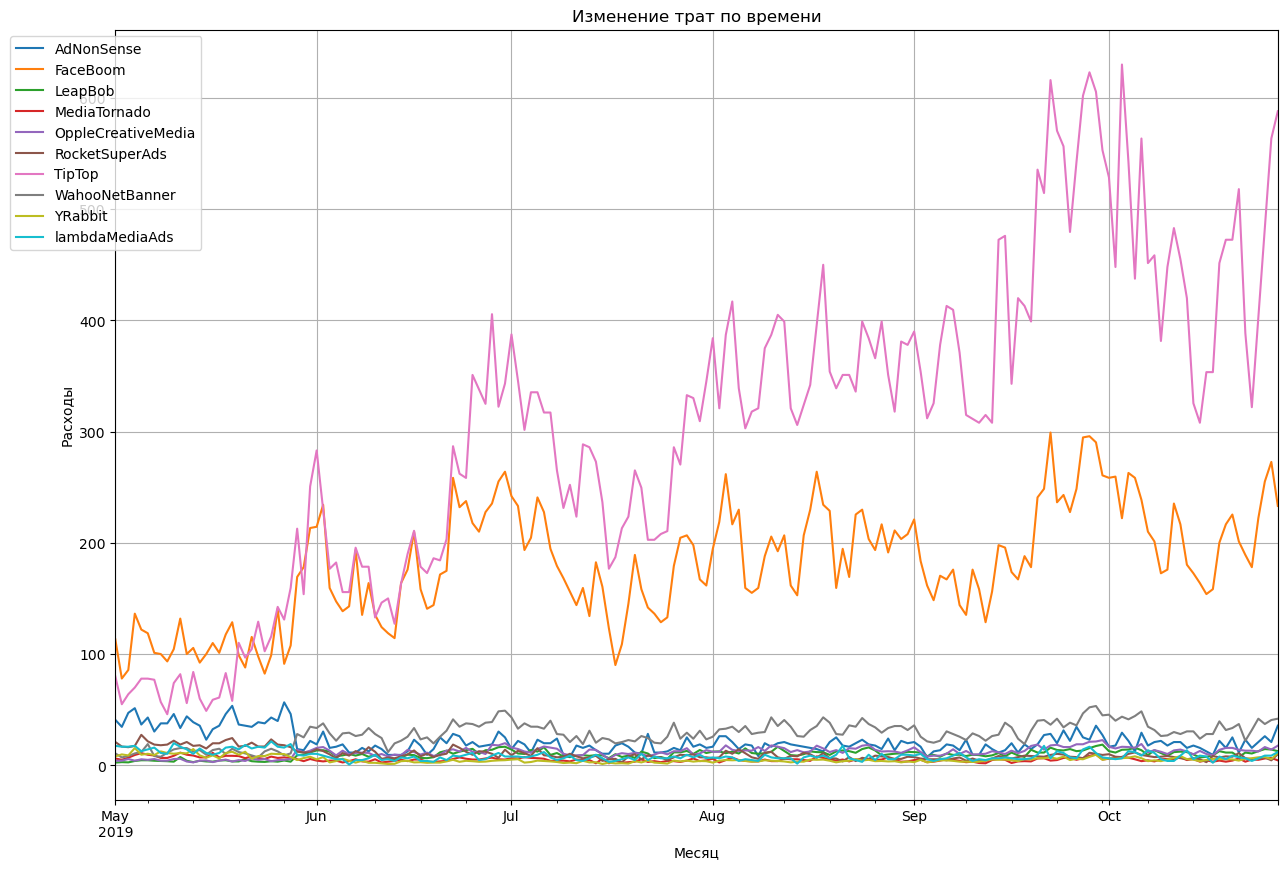

In [35]:
costs.pivot_table(
    index='dt',  # даты 
    columns='channel',  # источники переходов
    values='costs',  
    aggfunc='sum',  
).plot(figsize=(15, 10), grid=True)

plt.title('Изменение трат по времени')
plt.xlabel('Месяц')
plt.ylabel('Расходы')
plt.legend(bbox_to_anchor=(0.08, 1.0), loc='best')
plt.show()

<AxesSubplot:title={'center':'Расходы помесячно'}, xlabel='Месяц', ylabel='Расходы'>

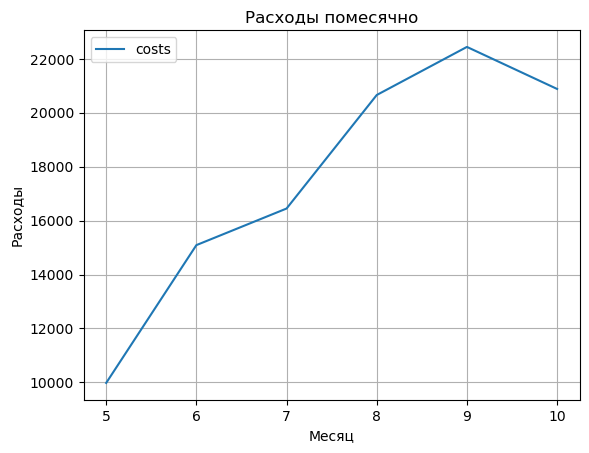

In [36]:
(
costs
    .groupby('month').agg({'costs': 'sum'})
    .plot(title='Расходы помесячно', xlabel='Месяц', ylabel='Расходы', grid=True))

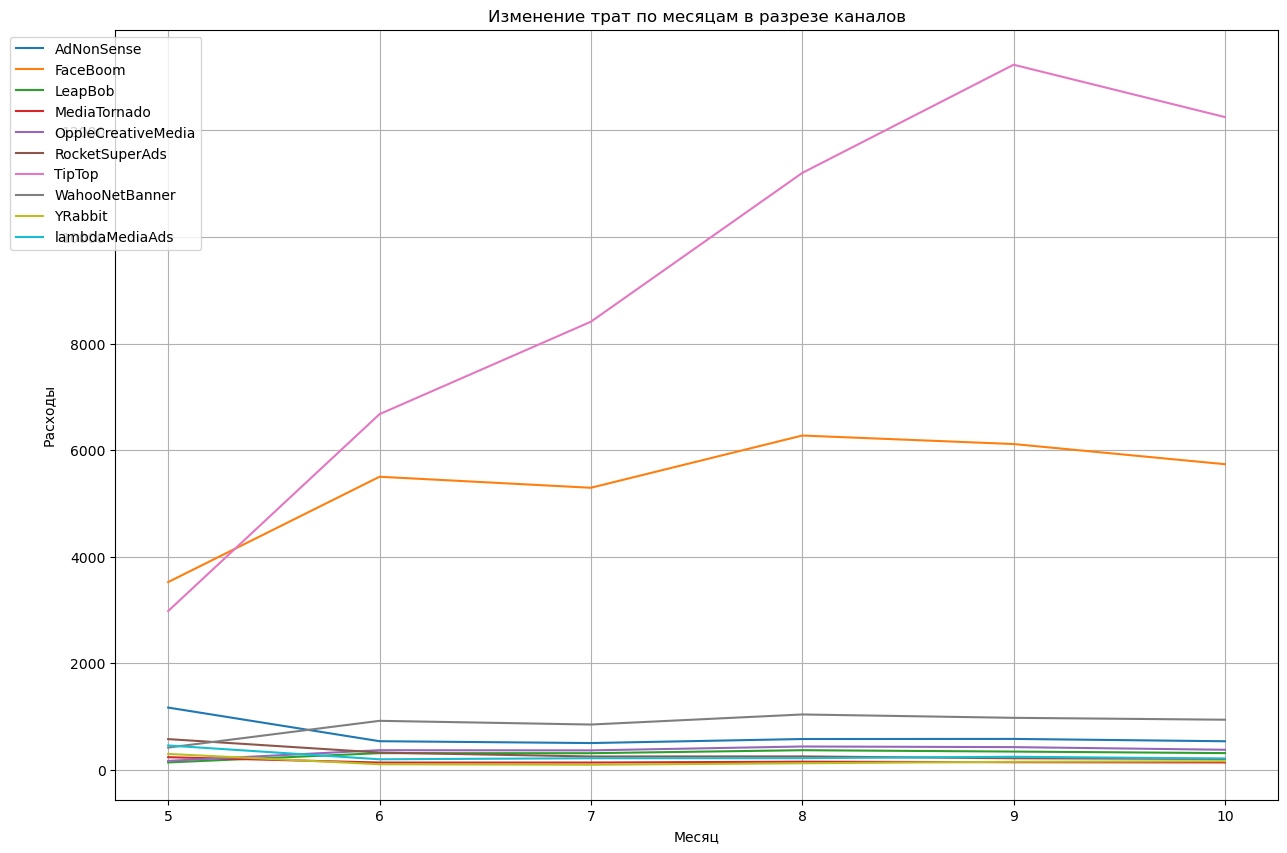

In [37]:
costs.pivot_table(
    index='month',  # даты 
    columns='channel',  # источники переходов
    values='costs',  
    aggfunc='sum',  
).plot(figsize=(15, 10), grid=True)

plt.title('Изменение трат по месяцам в разрезе каналов')
plt.xlabel('Месяц')
plt.ylabel('Расходы')
plt.legend(bbox_to_anchor=(0.08, 1.0), loc='best')
plt.show()

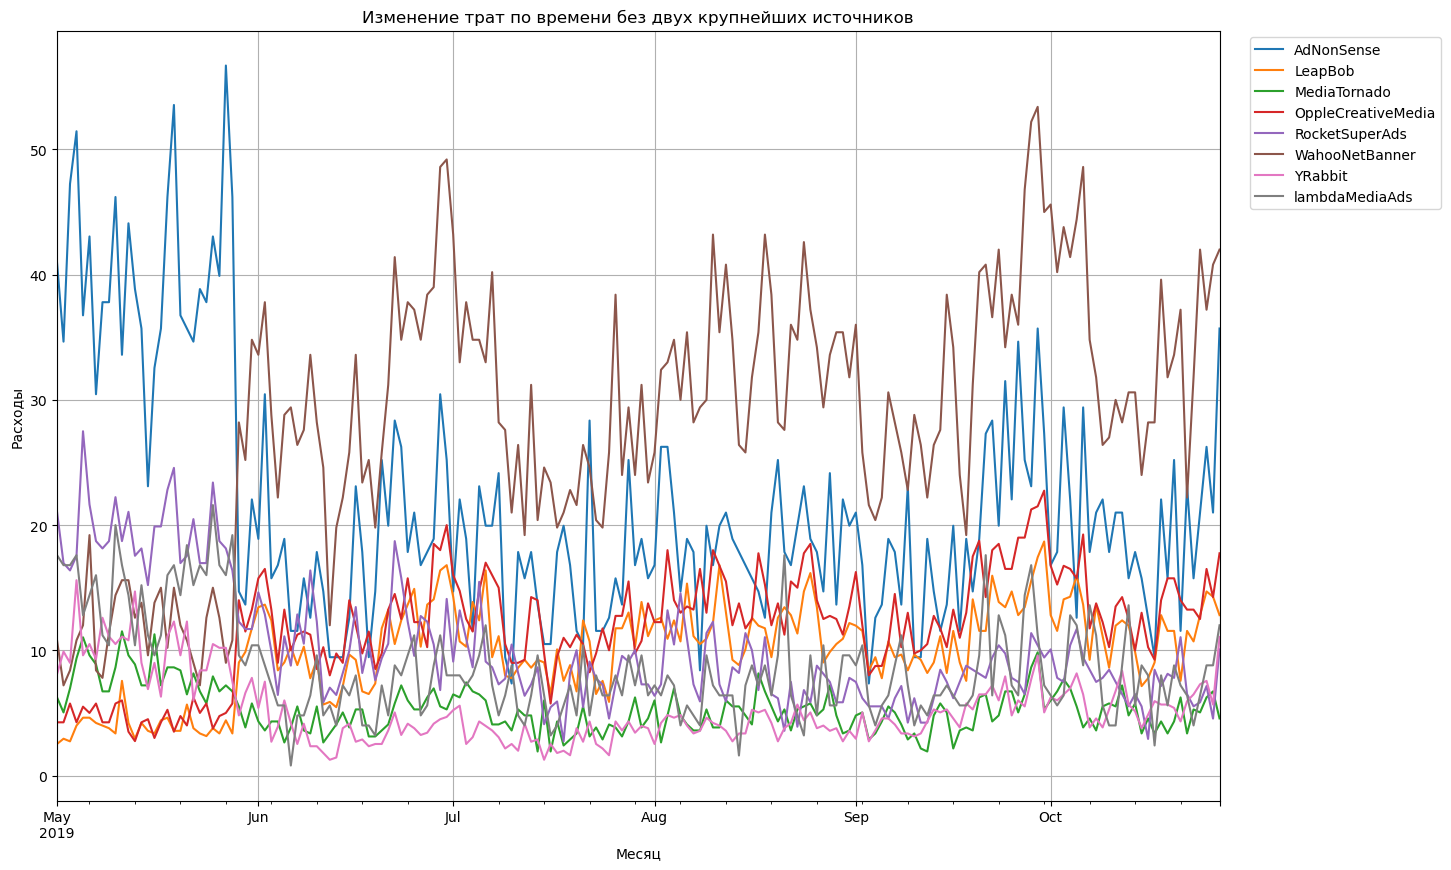

In [38]:
costs2 = costs[(costs.channel != 'FaceBoom') & (costs.channel != 'TipTop')]
costs2.pivot_table(
    index='dt',  # даты 
    columns='channel',  # источники переходов
    values='costs',  
    aggfunc='sum',  
).plot(figsize=(15, 10), grid=True)

plt.title('Изменение трат по времени без двух крупнейших источников')
plt.xlabel('Месяц')
plt.ylabel('Расходы')
plt.legend(bbox_to_anchor=(1.02, 1.0), loc='best')
plt.show()

Стоимость привлечения одного покупателя из каждого источника в среднем.

In [39]:
dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

In [40]:
# находим максимальную дату привлечения из сырых данных LTV
max_acquitision_dt = ltv_raw['dt'].max()
# отсекаем профили, которые «старше» этой даты
ltv_profiles = profiles.query('dt <= @max_acquitision_dt')

# оставшееся число пользователей на каждый лайфтайм
ltv_profiles.groupby('dt').agg({'user_id': 'nunique'})

user_id
dt                 
2019-05-01      909
2019-05-02      758
2019-05-03      849
2019-05-04     1015
2019-05-05      970
...             ...
2019-10-15      674
2019-10-16      656
2019-10-17      703
2019-10-18      911
2019-10-19      911

[172 rows x 1 columns]

In [41]:
# средний CAC по каналам привлечения
cac = (
    ltv_profiles.groupby('channel')
    .agg({'acquisition_cost': 'mean'})
    .rename(columns={'acquisition_cost': 'cac'}).sort_values(by="cac", ascending=False)
)
round(cac, 2)

cac
channel                
TipTop             2.76
FaceBoom           1.11
AdNonSense         1.01
lambdaMediaAds     0.73
WahooNetBanner     0.60
RocketSuperAds     0.42
OppleCreativeMedia 0.25
MediaTornado       0.22
YRabbit            0.22
LeapBob            0.21
organic            0.00

In [42]:
# средний CAC по всему проекту
cac_total = (ltv_profiles.agg({'acquisition_cost': 'mean'}))
round(cac_total, 2)

acquisition_cost   0.69
dtype: float64

In [43]:
# средний CAC по всему проекту без органических пользователей
ltv_profiles[ltv_profiles.channel != 'organic']
cac_no_organic = (ltv_profiles.agg({'acquisition_cost': 'mean'}))
round(cac_no_organic, 2)

acquisition_cost   0.69
dtype: float64

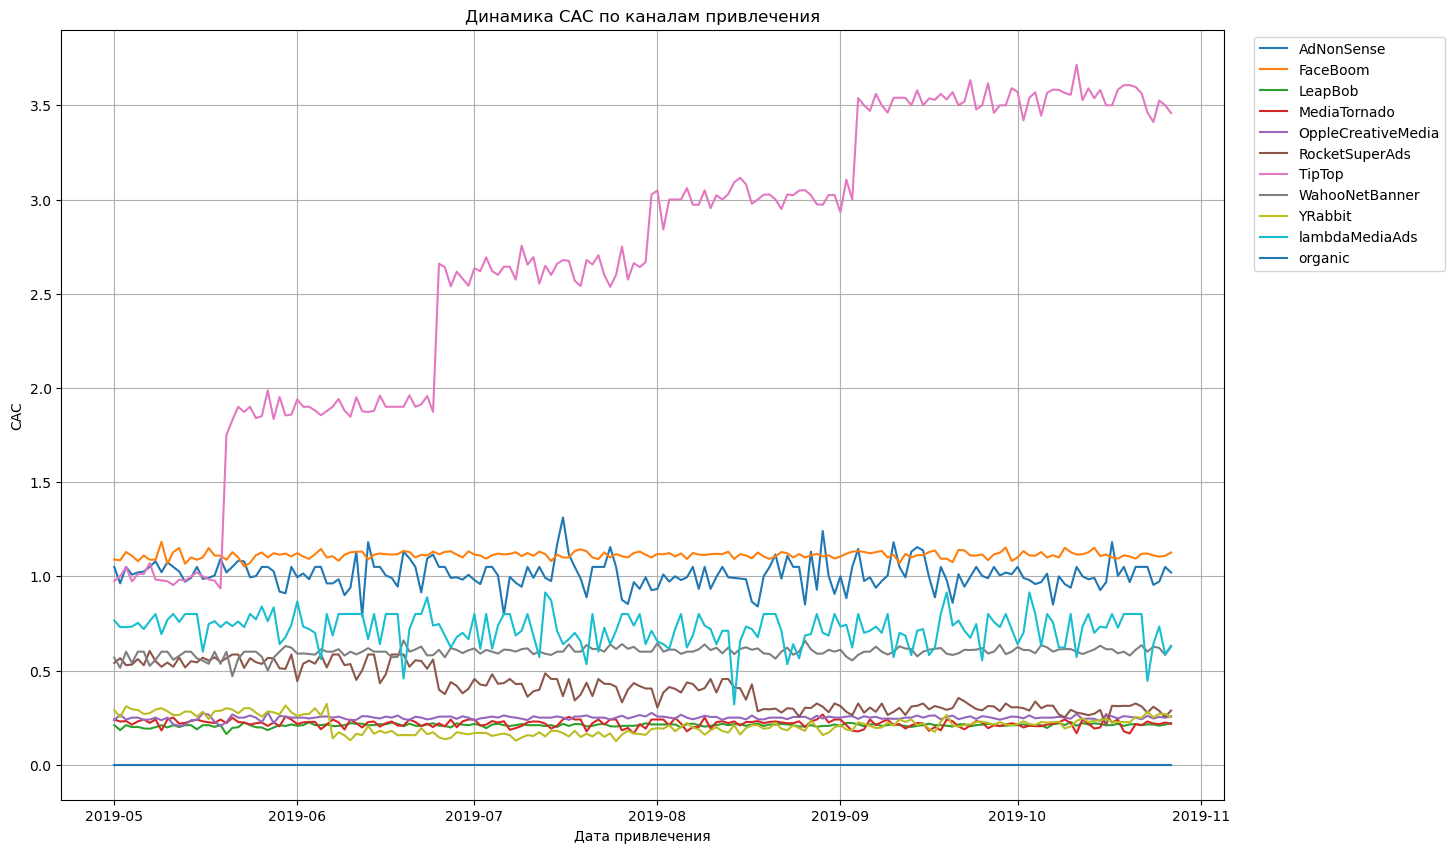

In [44]:
profiles.pivot_table(
    index='dt', columns='channel', values='acquisition_cost', aggfunc='mean'
).plot(grid=True, figsize=(15, 10))
plt.ylabel('CAC')
plt.xlabel('Дата привлечения')
plt.title('Динамика САС по каналам привлечения')
plt.legend(bbox_to_anchor=(1.02, 1.0), loc='best')
plt.show()

**Комментарии по разделу:**

Совокупные маркетинговые расходы составили 105497 денежных едениц (ден ед). Основные расходы - это более 82% осуществлялись в рамках компаний через источники TipTop - 54751,3 ден ед и FaceBoom - 32445,6 ден ед. Расходы по остальным источникам рекламы составили значительно меньшую сумму и колебались от 944 до 5151 ден ед.

Ежемесячные совокупные расходы на рекламу с 10 тыс ед в мае до 20,8 тыс ед в октябре. Основными драйверами роста расходов на рекламу были источники TipTop и FaceBoom, причем темпы роста расходов на TipTop значительно опережали рост расходов на FaceBoom и прочие каналы. Ежемесячные расходы на рекламы по остальным каналам значительно уступают лидерам и колеблятся от 1 до 57 ден ед.



Очевидно что средняя стоимость привлечения одного покупателя через источник "organiс" ничего не будет стоить. Самая высокая стоимость привлечения одного покупателя через источник TipTop - 2,76 ден ед. Далее идет источник FaceBoom с 1,11 ден ед за одного покупателя. 

В течении 6 месяцев средние удельные расходы на привлечение одного покупателя растут высоким темпами только у источника TipTop. Аналогичный среднемесячный показатель у остальных источников значительно ниже и он практически не меняется в течении рассматриваемого периода. 

Странно что средний САС с учетом и без учета "органик" один и тот же и составляет 0,69 ден ед

## Оценим окупаемость рекламы для привлечения пользователей


### Проанализируем общую окупаемость рекламы

Исключаем из анализа данные относящиеся к рекламному источнику 'organic'

In [45]:
profiles = profiles.query('channel != "organic"')

Соберём функции для визуализации метрик удержания, конверсии, LTV и ROI - filter_data(), plot_retention(), plot_conversion() и plot_ltv_roi().

In [46]:
def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

In [47]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

In [48]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

In [49]:
# функция для визуализации LTV и ROI
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(30, 15))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV', fontsize=25)

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon), fontsize=25)

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей', fontsize=25)


    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI', fontsize=25)

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon), fontsize=25)
    
    plt.tight_layout()
    plt.show()

Считаем бизнес показатели:


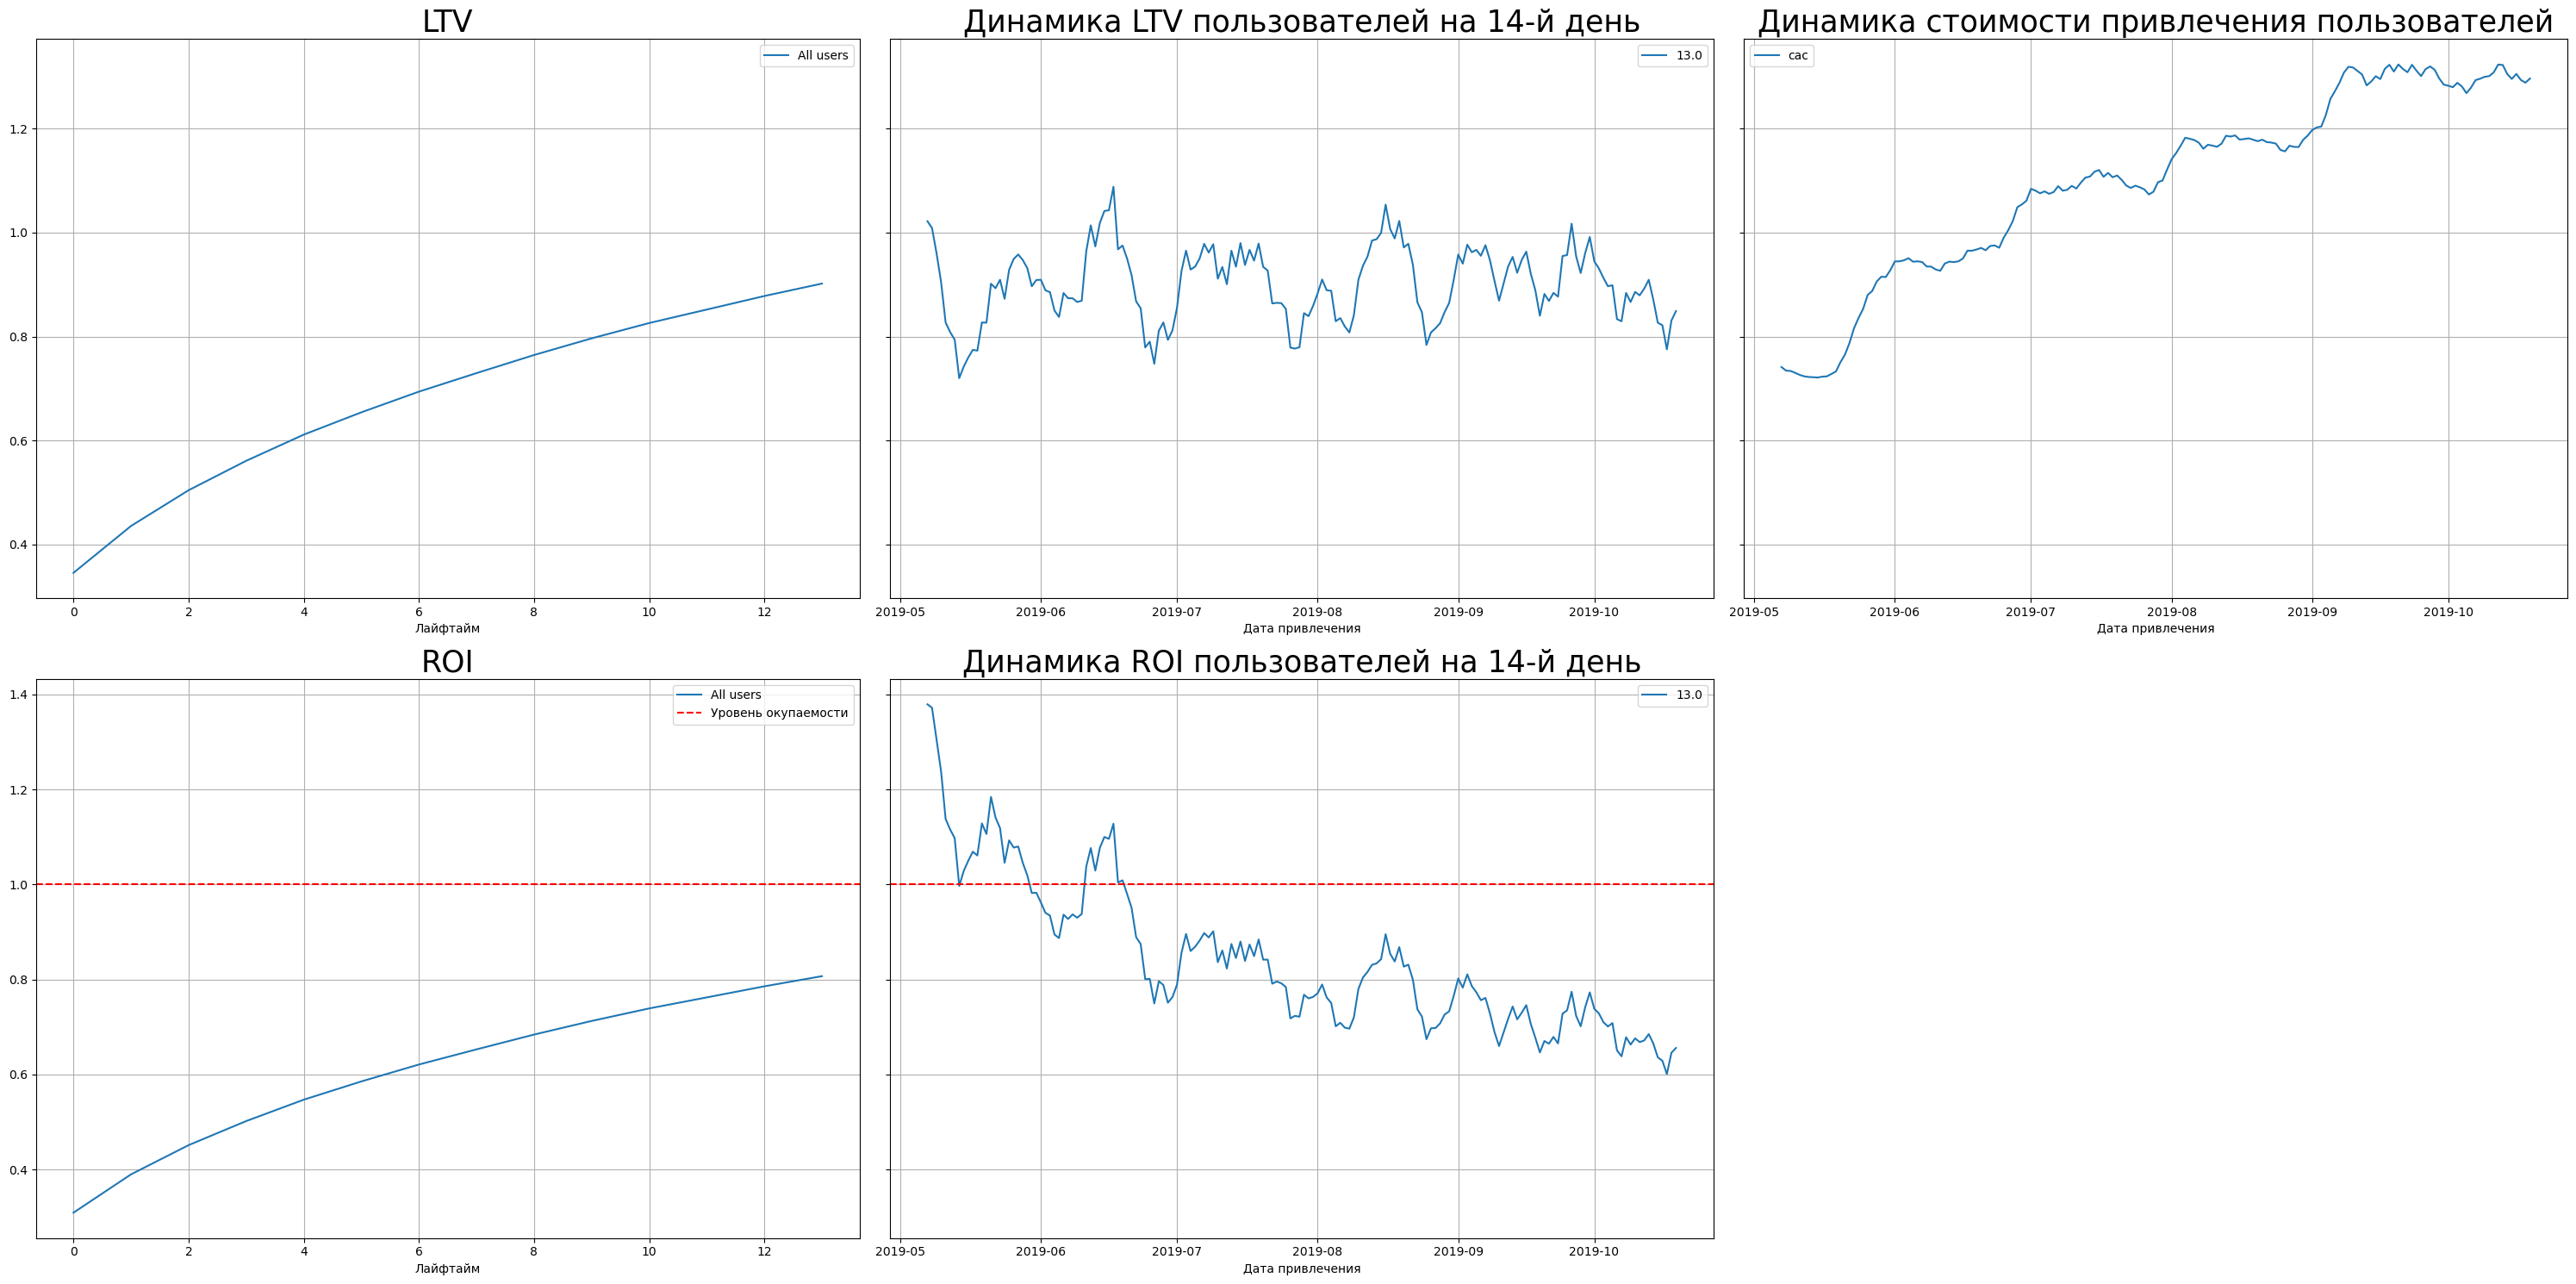

In [50]:
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

**Промежуточный вывод:**

1. Кривая LTV показывает что "жизненная ценность" пользователей приложения стабильно растет.

2. При этом, динамика САС демонстрирует нестабильность и выросла более чем в два раза за 6 мес. Можно предположить что проблемы связаны с увеличением расходов на рекламу

3. Кривая ROI показывает, что цели по окупаемости рекламных расходов не выполняются. На 14 день окупаемость достигла 80% 



### Проанализируем окупаемость рекламы с разбивкой по устройствам

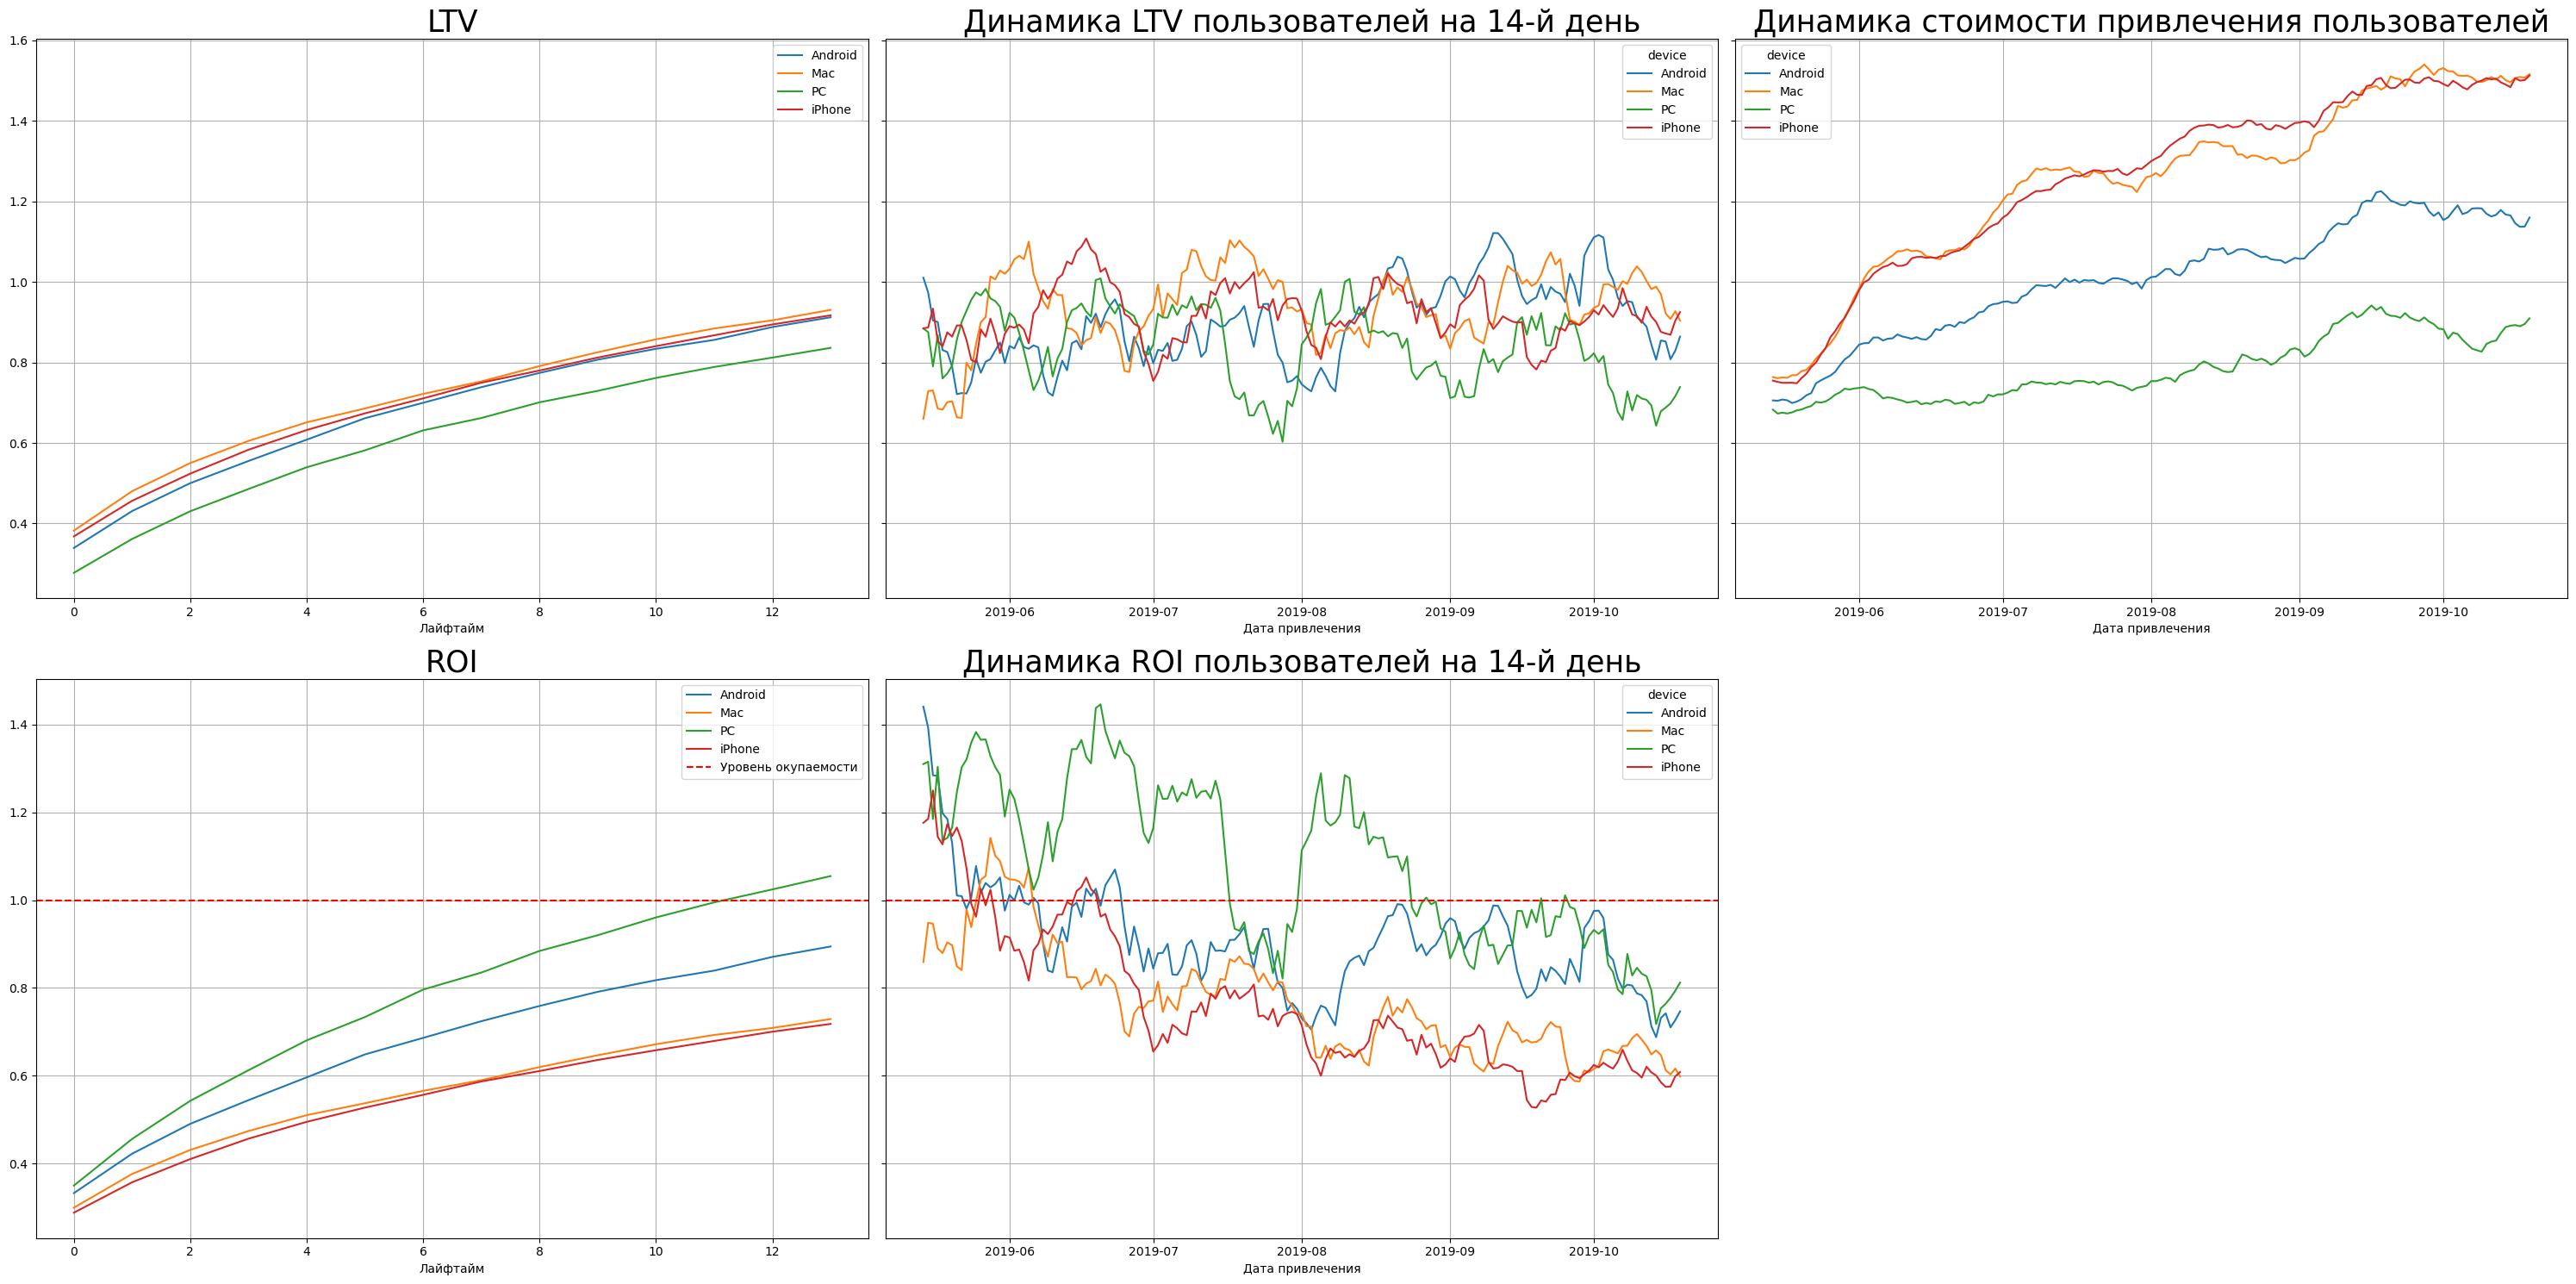

In [51]:
dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

**Промежуточный вывод:**

1. LTV по всем устройствам ожидаемо растет, при этом темпы роста пользователей на платформе РС несколько ниже роста по остальным платформам

2. Расходы на привлечение пользователей (САС) также растут. В лидерах рост расходов на превличение пользователей на платформах МАС и iPhone. Ниже идут расходы на привлечение пользователей на Android и самые низкие расходы (с незначительными темпами роста) - это расходы на пользователей РС. 

3. Только окупаемость рекламы направленная на привлечение пользователей РС по срокам оправдывает ожидания - на 11 день. Все остальные в течении 14 дней не окупаются.

### Проанализируем окупаемость рекламы с разбивкой по странам

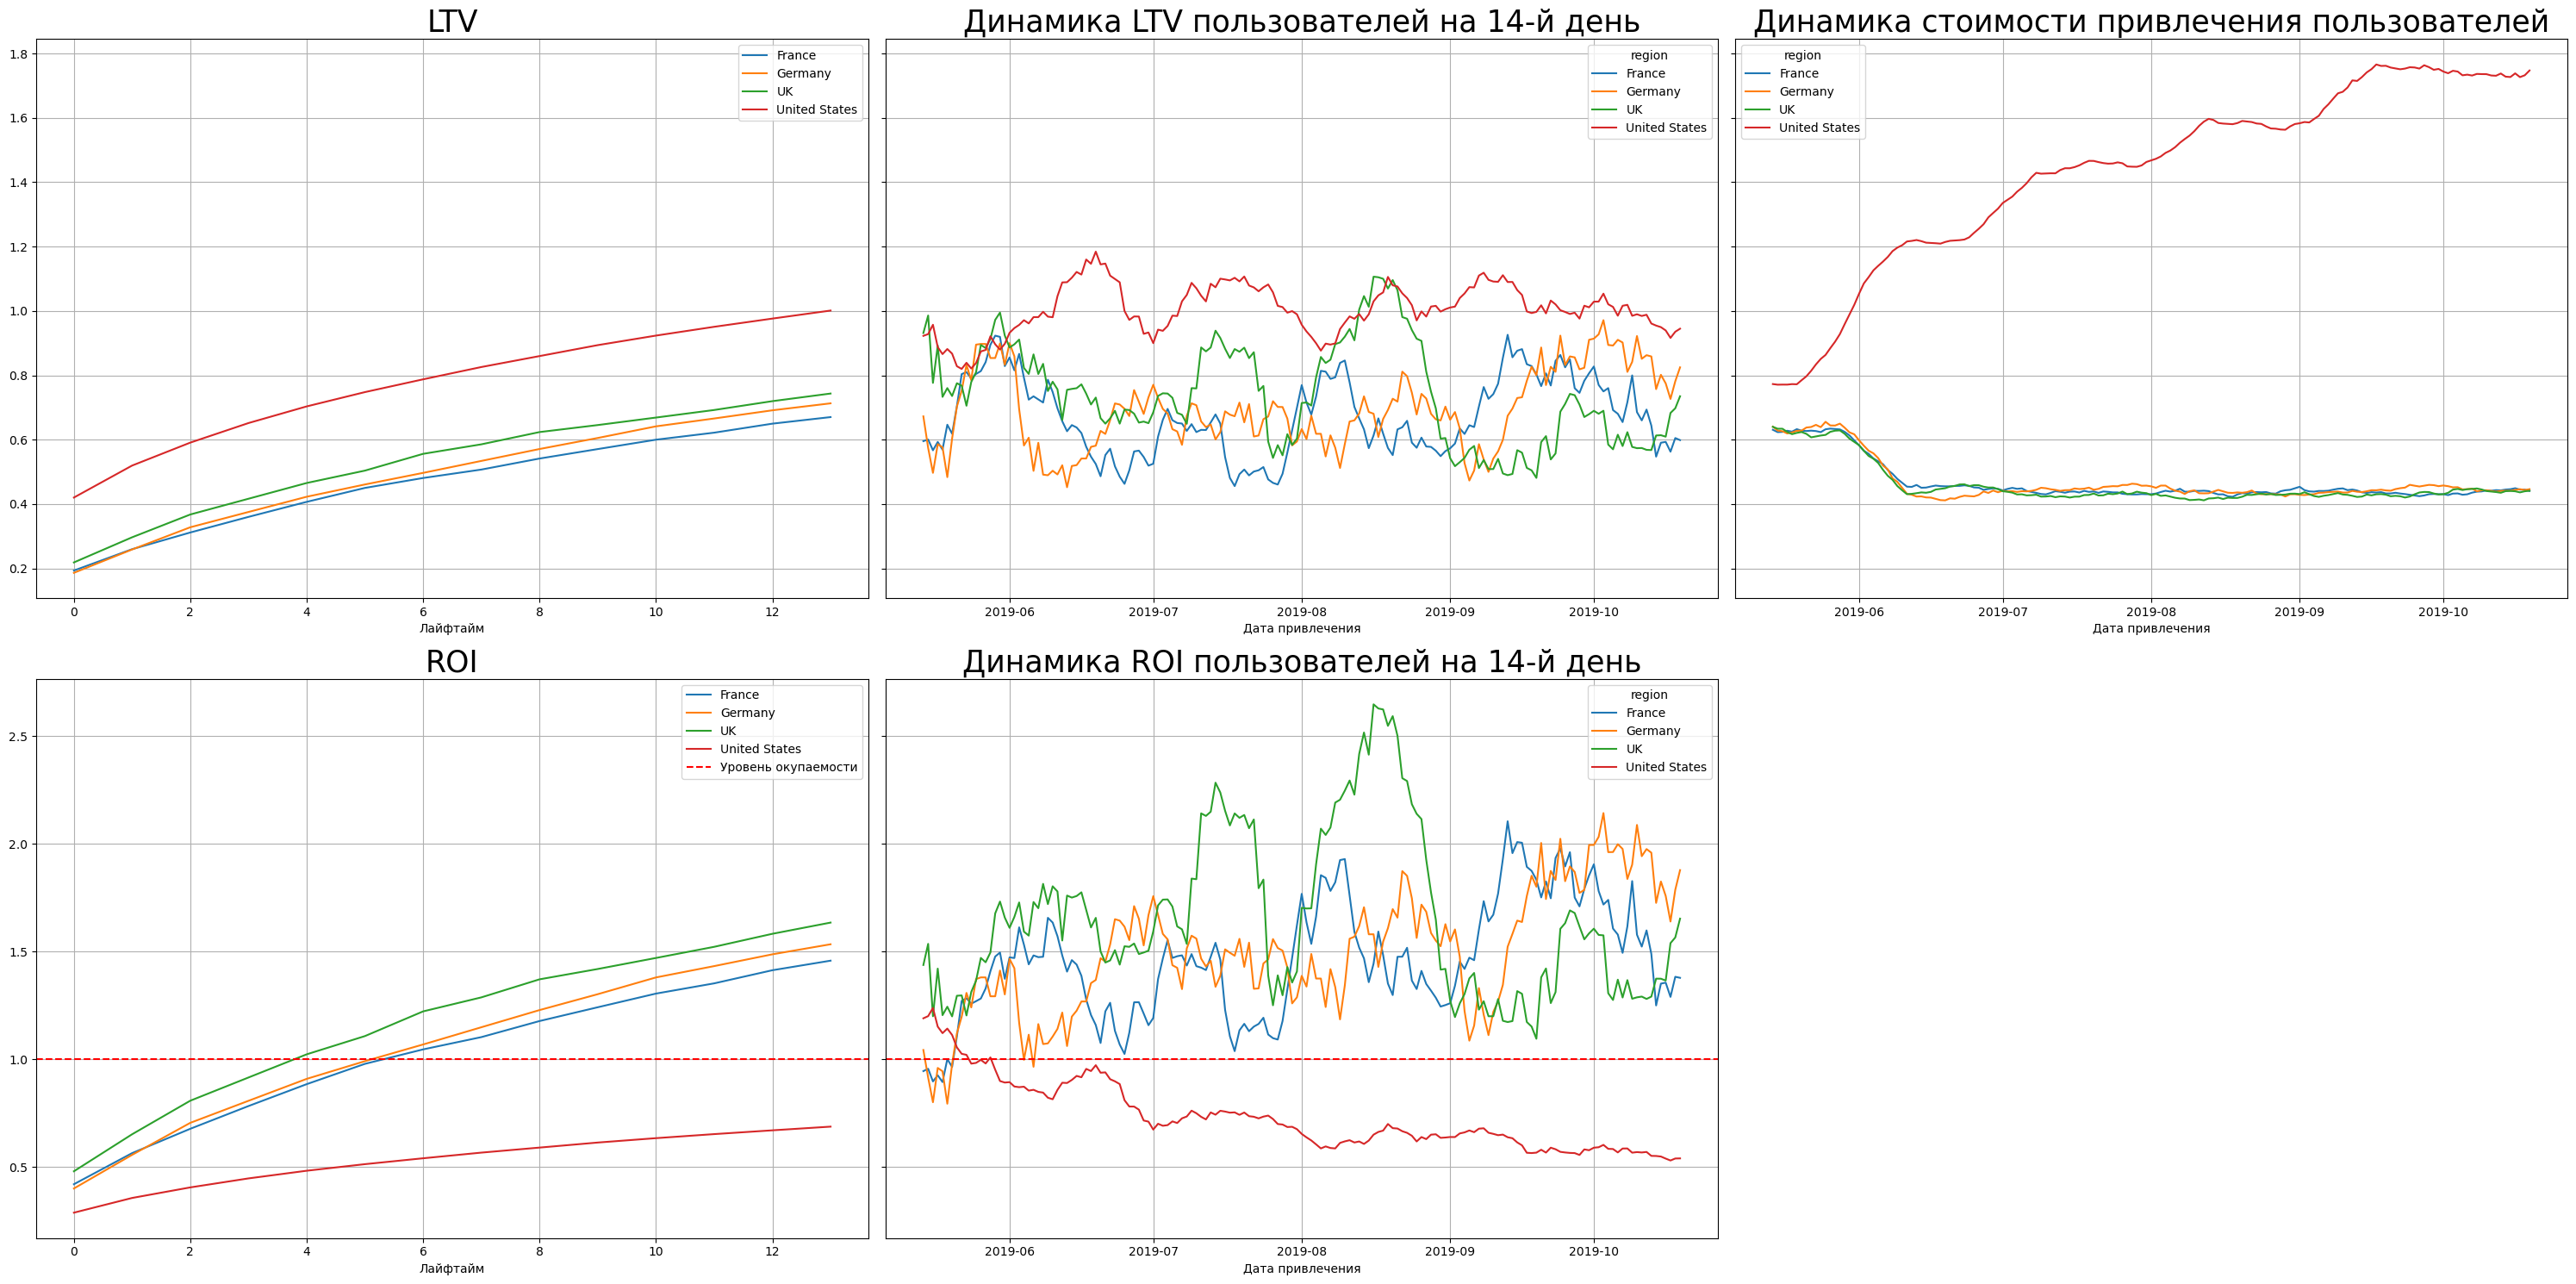

In [52]:
dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

**Промежуточный вывод:**

1. LTV растет по всем странам, а по пользователям США график показывает значительное опережение
2. CAC показывает значительные траты на рекламу пользователей из США и при этом расходы растут значительными темпами. Расходы на рекламу в других странах наоборот упали в июне 2019 и остаются стабильными до октября.
3. График ROI показывает что только расходы на привлечение пользователей из европейских стран окупают себя на 4-5 день. Ожидания по окупаемости расходов на маркетинг в США себя не оправдывают.

### Проанализируем окупаемость рекламы с разбивкой по рекламным каналам

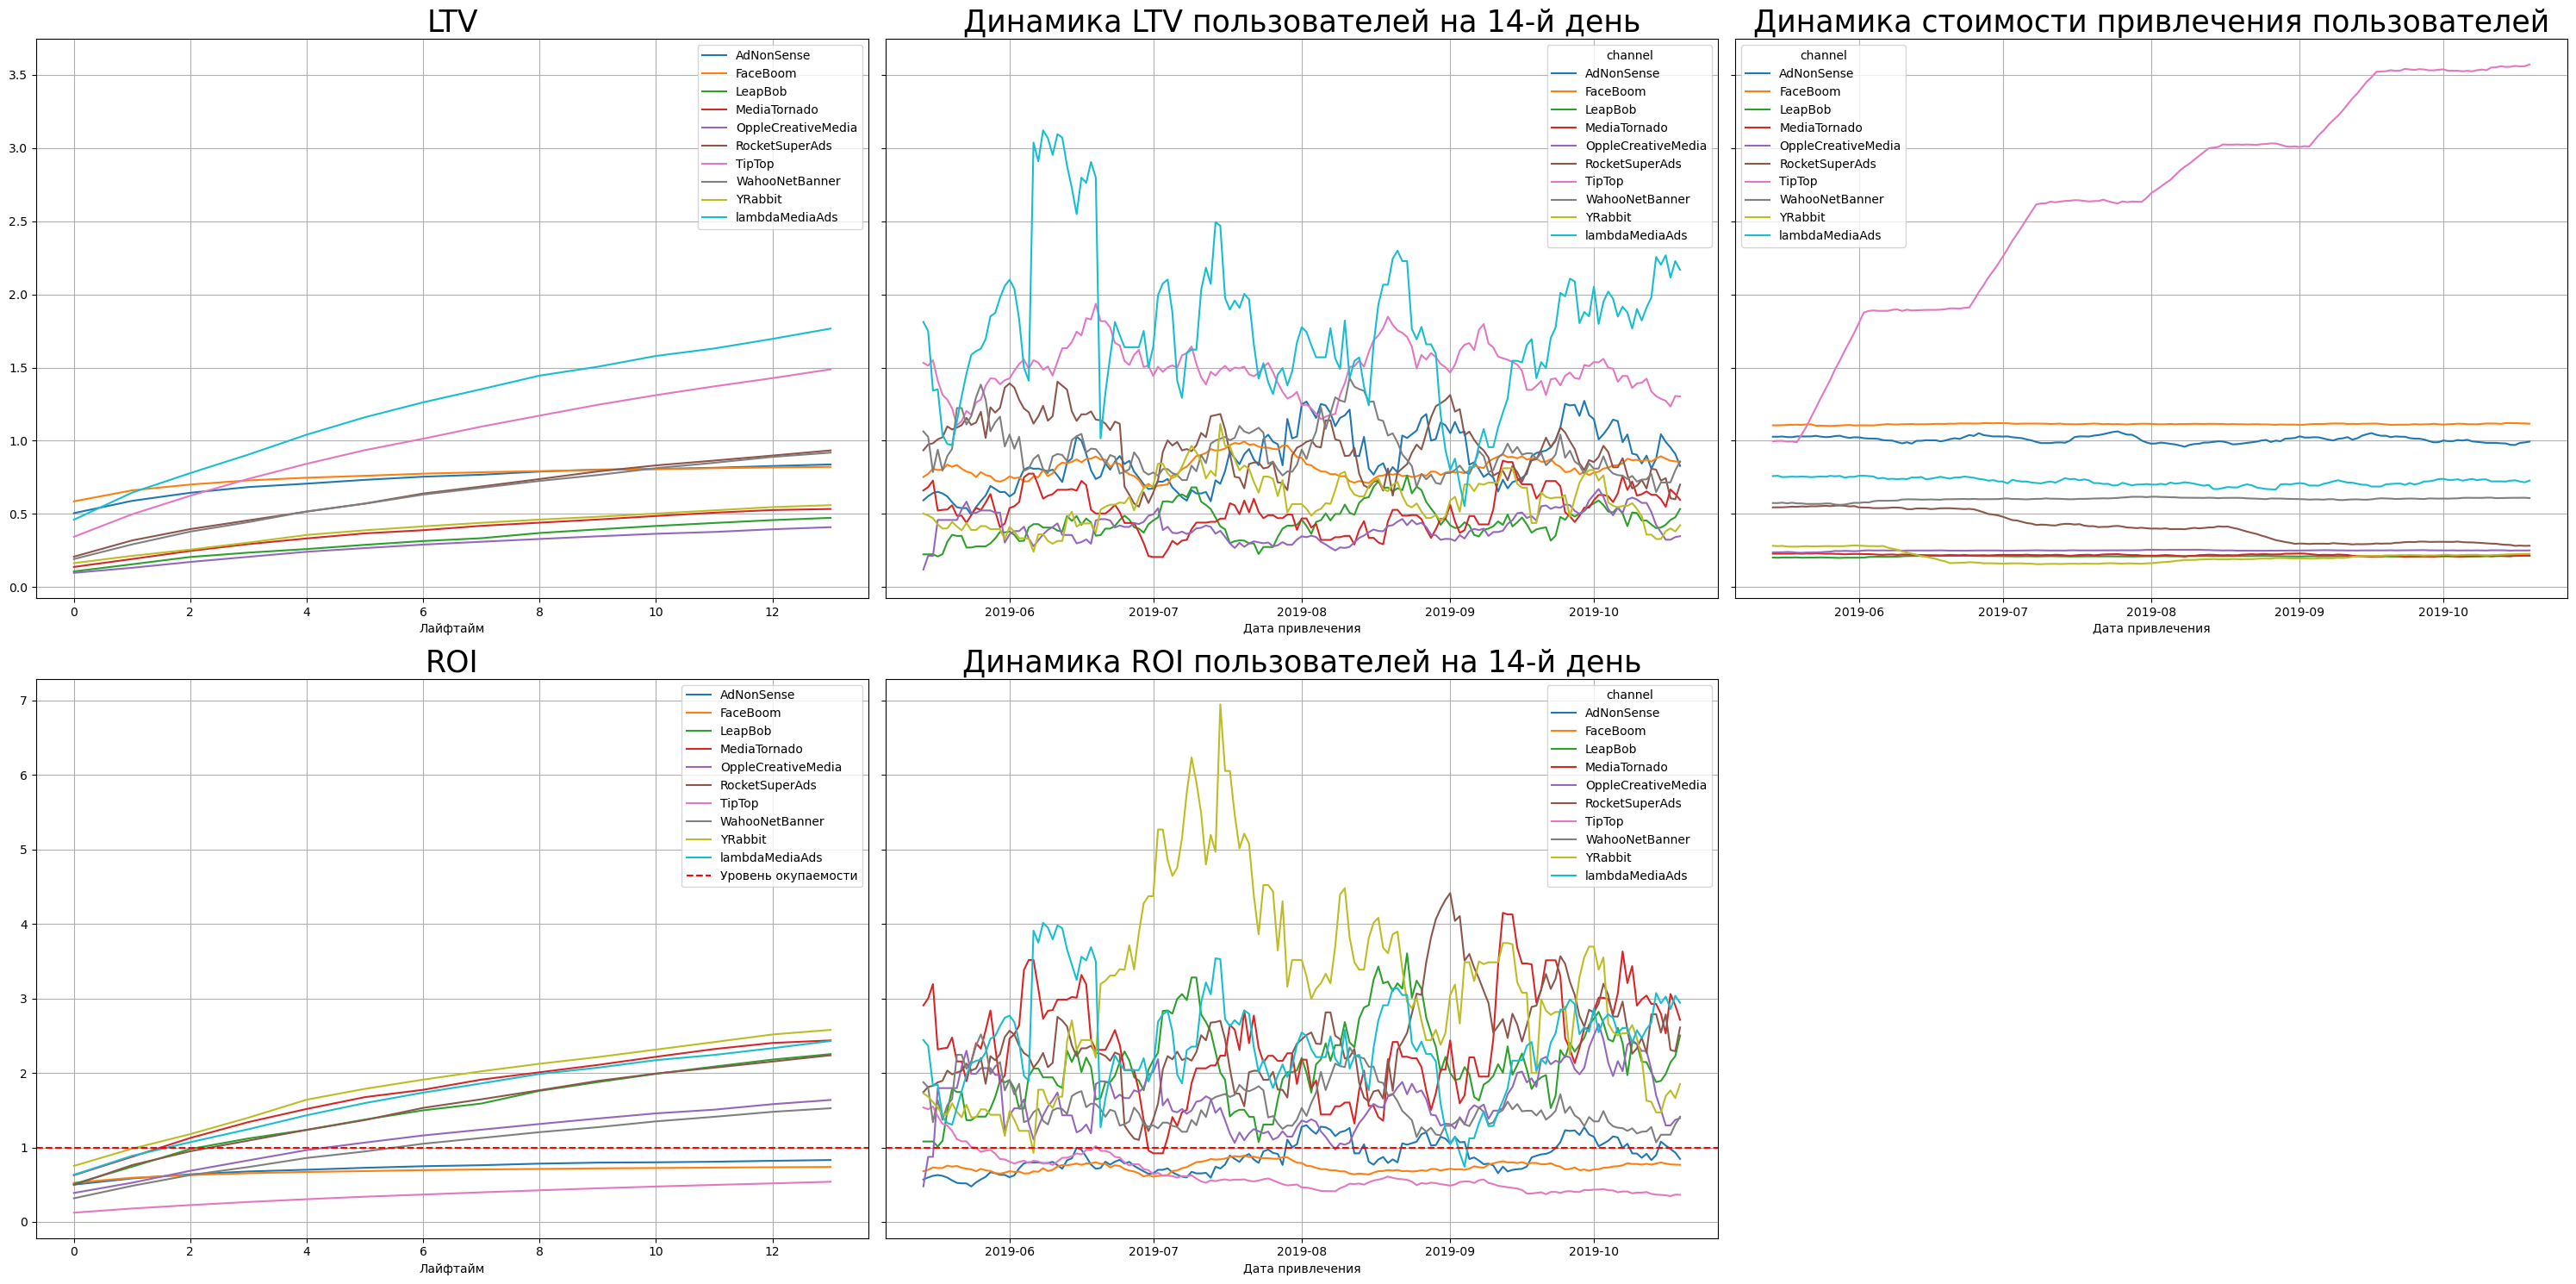

In [53]:
dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

**Промежуточный вывод:**

1. LTV в разрезе источников рекламы растет с разными темпами. В частности наибольшие доходы приносят пользователи пришедшие через каналы lambdaMediaAds и TipTop. Остальные источники демонстрируют умеренные темпы роста LTV.
2. CAC показывает, что только один канал - TipTop, демонстрирует высокие темпы роста рекламных расходов на 1 пользователя. Стоимость привлечения клиентов по остальным каналам либо стабильно низкая, либо демонстрирует снижение
3. Практически все каналы демонстрируют окупаемость рекламных расходов с 1 на 6 день, кроме каналов lambdaMediaAds, TipTop и LeapBob. Они себя не окупили за 14 дней



**Конверсия и удержание по устройствам:**

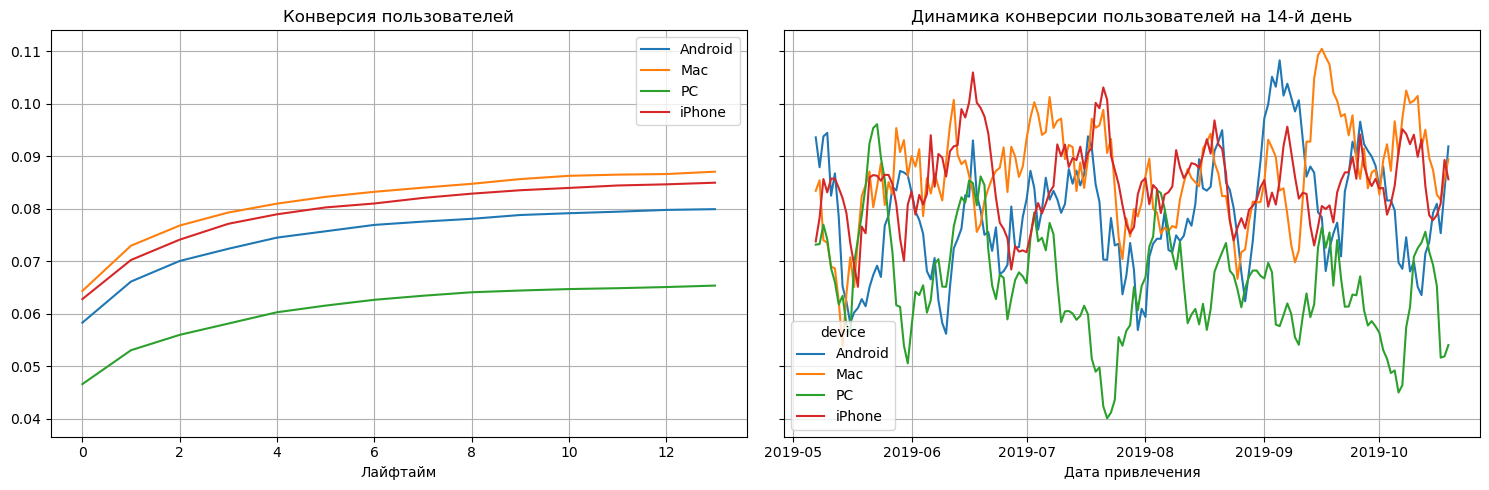

In [54]:
dimensions = ['device']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

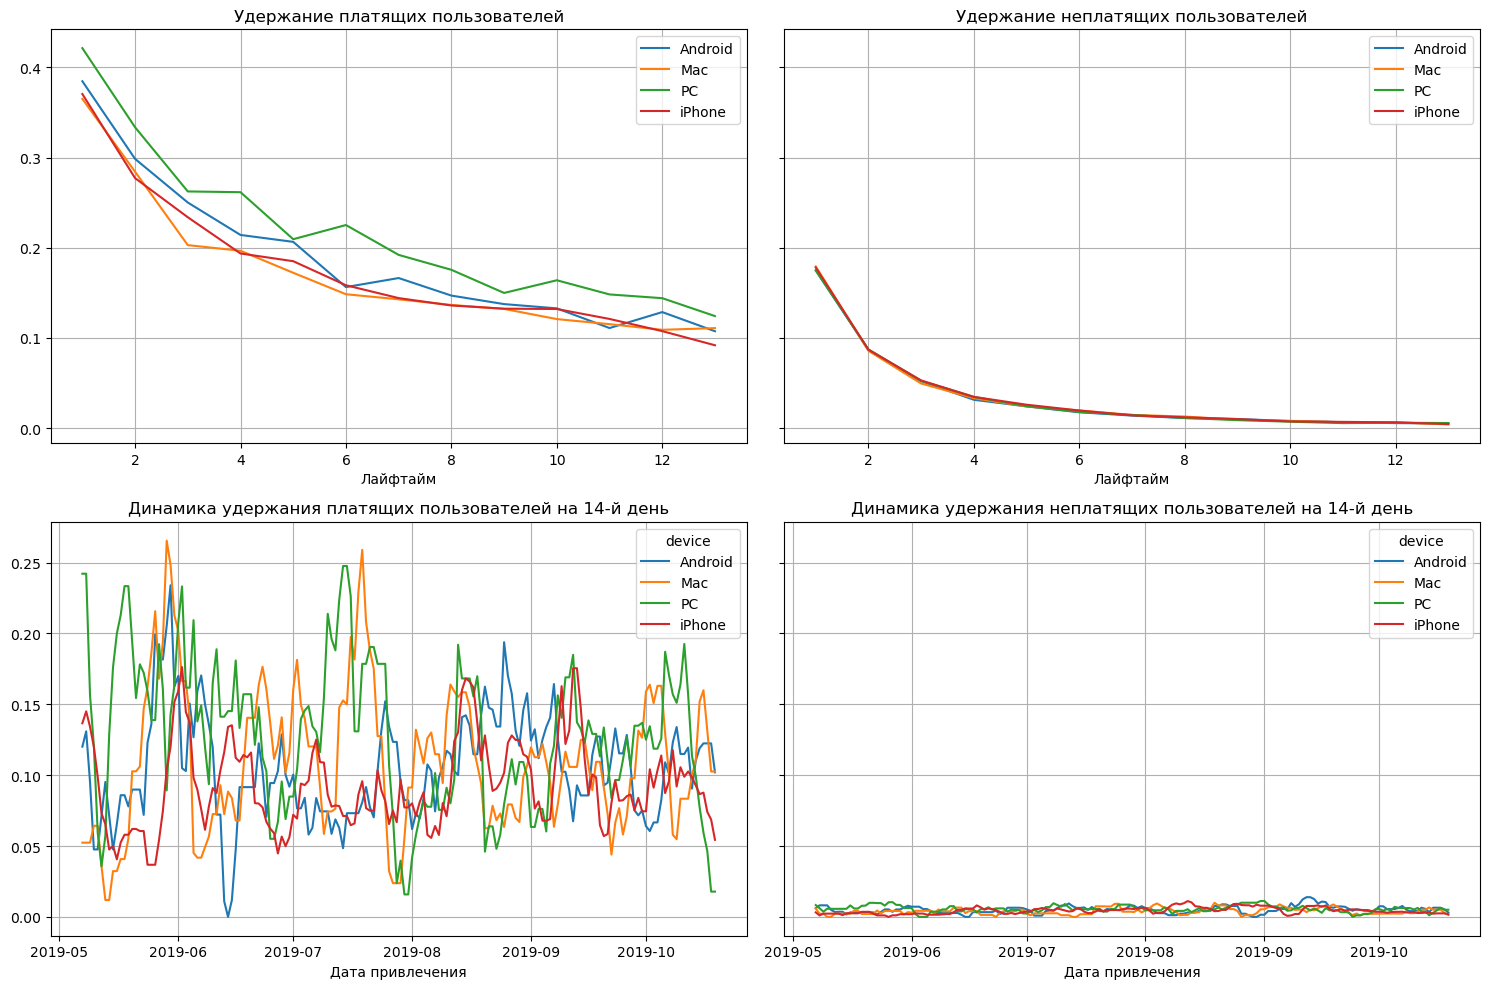

In [55]:
dimensions = ['device']

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)

Хорошо конвертируются пользователи всех видов устройств, кроме РС. Обратную картину показывает удержание: пользователи РС удерживаются лучше чем на Android, Mac и iPhone.


**Конверсия и удержание по странам:**

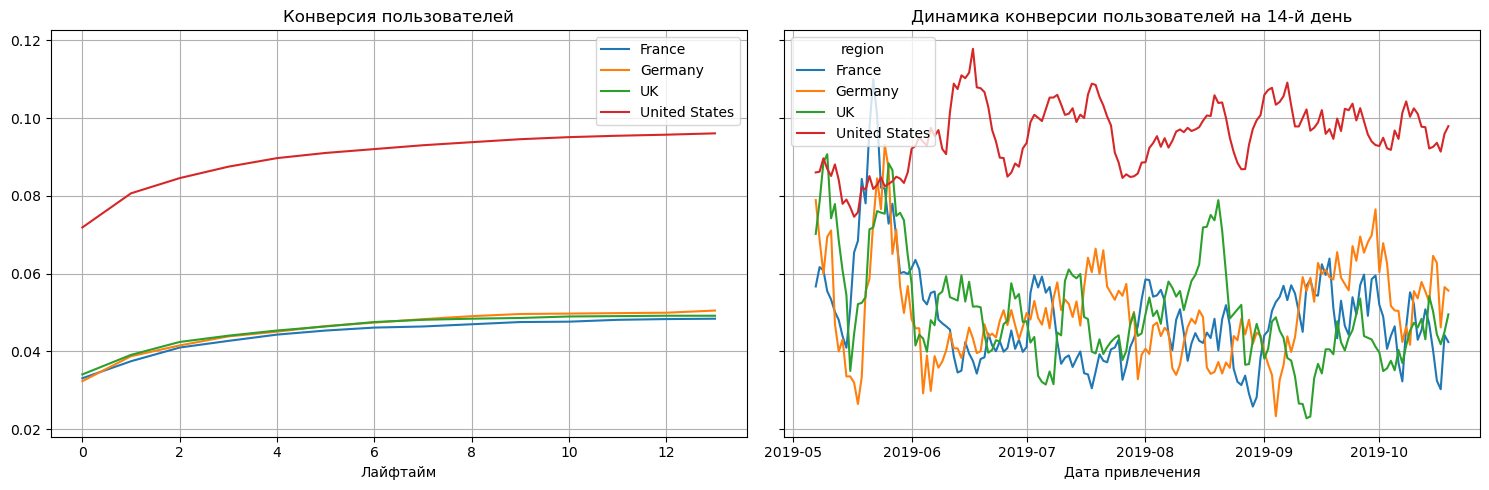

In [56]:
dimensions = ['region']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

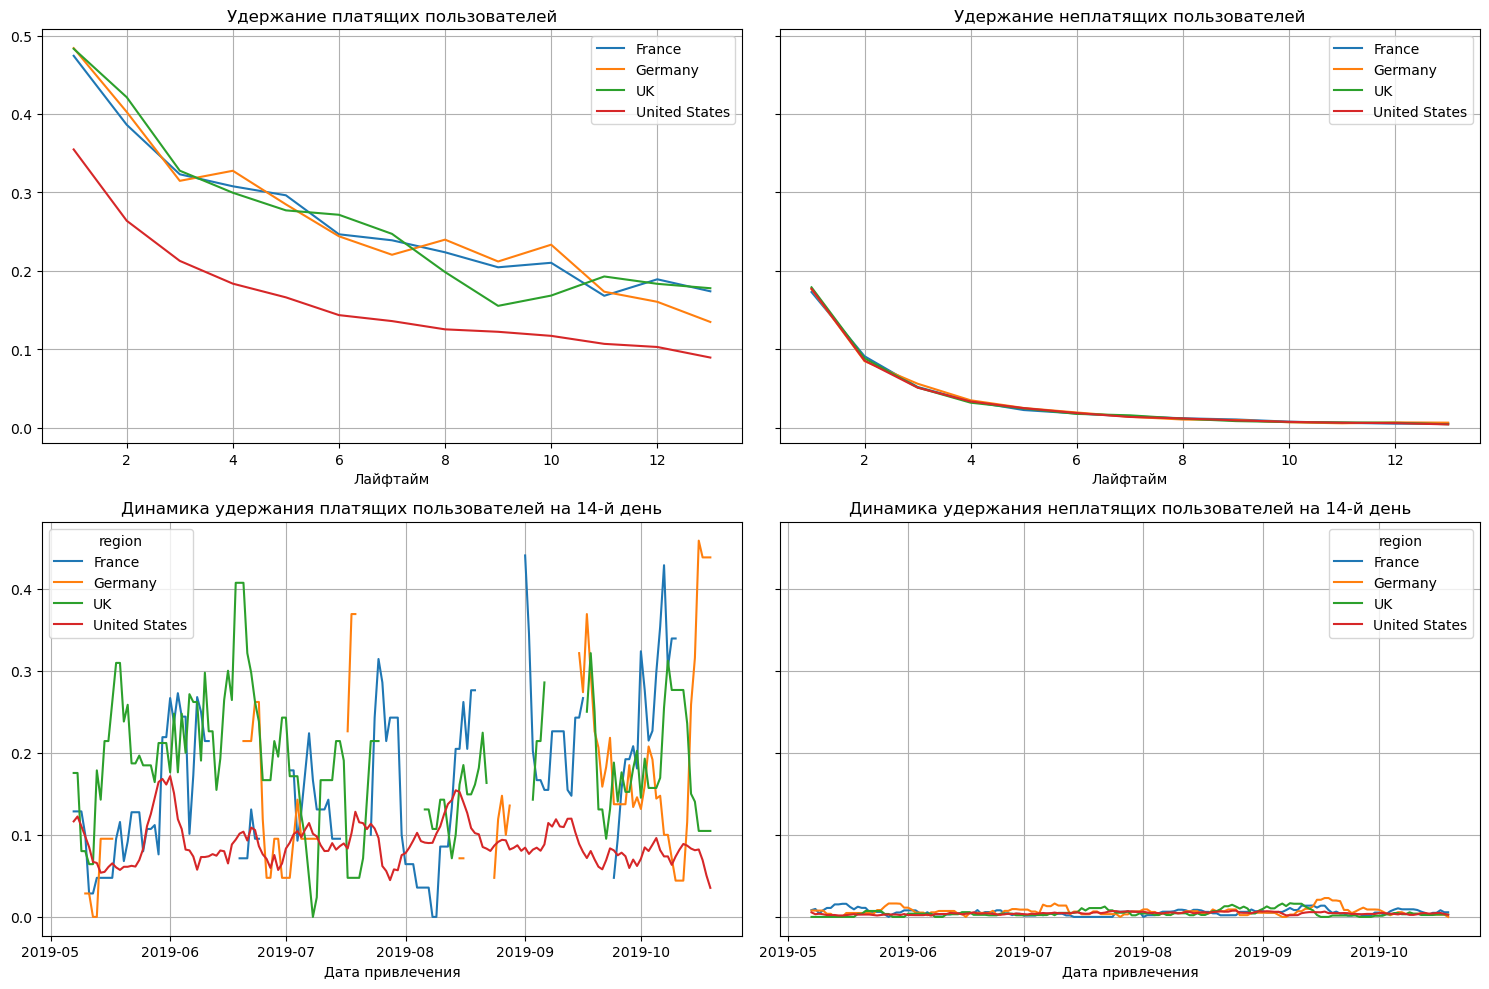

In [57]:
dimensions = ['region']

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)

По конверсии в разрезе стран значительно выделяются пользователи из США. А вот удержание показывает обратную картину - пользователи из США удерживаются хуже на 10-15% чем пользователей из других стран


**Конверсия и удержание по рекламным каналам:**

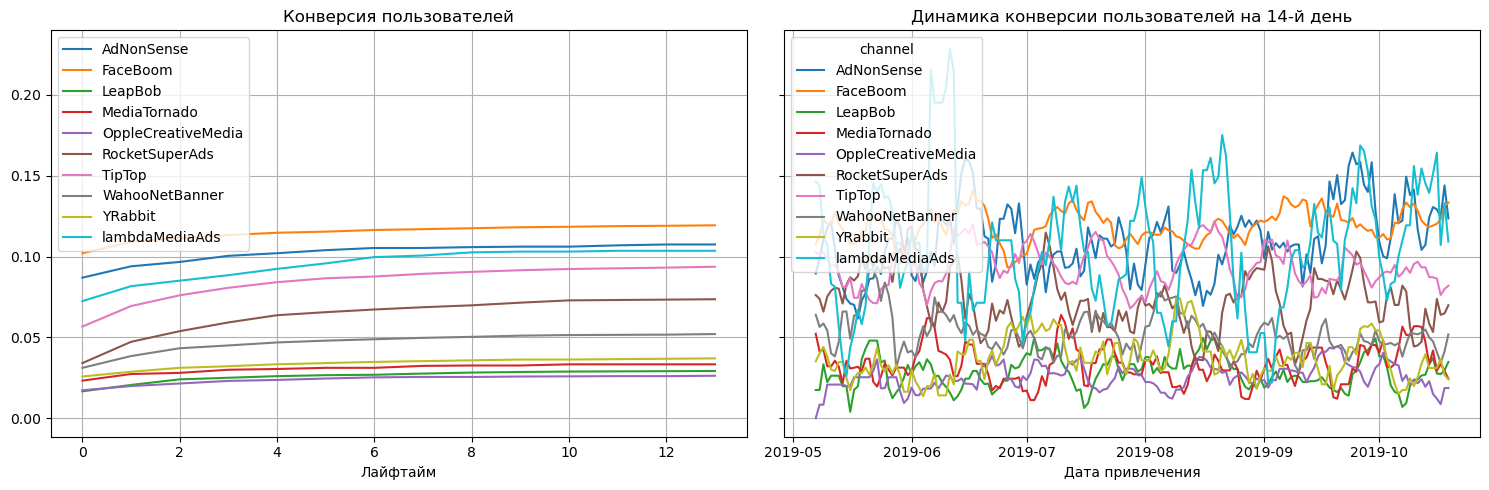

In [58]:
dimensions = ['channel']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

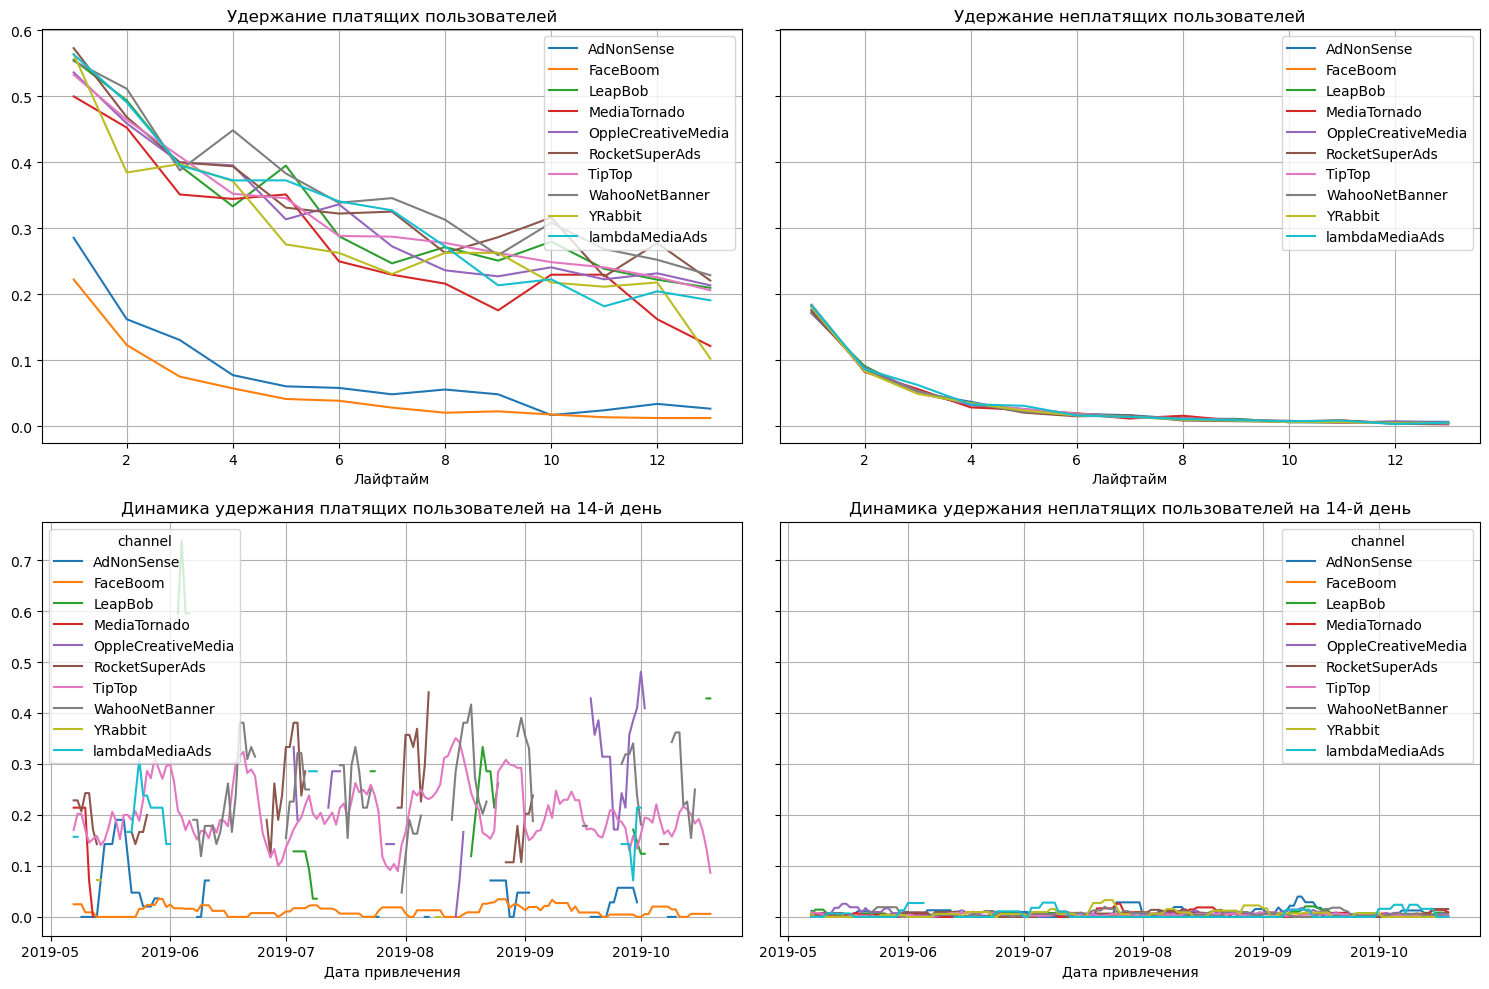

In [59]:
dimensions = ['channel']

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)

По удержанию хуже всех обстоят дела у FaceBoom и AdNoneSence, при этом они имеют самые высокие показатели конверсии 

### Вывод 

Одна из основных причин убытков приложения Procrastinate Pro+ является отсутствие окупаемости расходов на рекламу на 14 день. По факту на конец этого срока эти расходы окупаются всего на 80%.

1. Пользователи iPhone, МАС и Android являются драйверами негативной окупаемости расходов на рекламу. Не смотря на самую низкую конверсию, рекламные расходы на пользователей РС окупаются на 12 день.

2. США - единственная страна, где высокие темпы роста расходов на рекламу и остуствует окупаемость расходов

3. Сами рекламные расходы на одного пользователя (САС) соответсвуют темпам роста расходов через рекламный канал TipTop. Этот же канал входит в число оутсайдеров по окупаемости расходов

Кривая САС демонстрирует одну и ту же динамику роста рекламных расходов на пользователей iPhone и Mac в США через рекламный канал TipTop 

  

## Основные выводы

- Причины неэффективности привлечения пользователей;
- Рекомендации для отдела маркетинга для повышения эффективности.

Итак, совокупное количество пользователей из США и трех европейских стран – Великобритания, Франция и Германия, составило 150008 пользователей. Основной профайл пользователя приложения – это пользователь iPhone, Mac или Android из США привлеченный через каналы TipTop или FaceBoom. При этом только **15% пользователей из США** оплачивают покупки. Доля пользователей-плательщиков из европейских стран этот показатель составляет от 24 до 26%. 

Удельная стоимость привлечения пользователей через каналы Tiptop и FaceBoom составляет 2,76 и 1,11 ден ед, соответственно. При этом расходы на канал TipTop растут ежемесячно. 

В целом, цели по окупаемости рекламных расходов не выполняются - окупаемость 80% на 14 день. Основные драйверы влияющие на неудовлетворительное финансовое положение - это пользователи iPhone, Mac и Android из США, привлекаемые через рекламный канал TipTop. Можно сделать предположение, что в США достаточно высокая конкуренция на рынке данных приложений, и соответственно, рекламные компании этим пользуются. Соотношение LTV и CAC должно обеспечивать целевой срок окупаемости: по устройствам это пользователи РС из европейских стран. ROI 7 каналов из 10 позволило им окупиться в период с первого по шестой день.

Рекомендации для отдела маркетинга приложения Procrastinate Pro+: рекомендуется начать поиск и переход на рекламного провайдера с оптимальным соотношением LTV и САС в целях обеспечения ожидаемого срока окупаемости рекламных расходов. Такую работу прежде всего надо провести в США, по каналу TipTop - от услуг данного провайдера следует отказаться. Также, при принятии финансовых решений необходимо обатить внимание на пользователей всех устройств в США - ROI по данной категории пользователей не достаточна для выполнения целей по окупаемости.

<br>Что можно сказать про каналы Yrabbit и RocketSuperAds:
<br>1. Удельные расходы на рекламу (CAC) у обоих каналов на минимальном уровне и даже несколько снижаются.
<br>2. Окупаемость расходов первого и второго сразу после первого и второго дня, по этому показателю они находятся в числе лидеров.
<br>3. По показателю "конверсия пользователей" они далеко не в числе лидеров, но тем не менее данные каналы, как правило, демонстрируют рост в течении 6 дней, а далее остаются стабильными.
<br>4. По "удержанию платящих пользователей" данные каналы, также находятся в числе лидеров.
<br> 
<br>Так что по совокупности факторов данные каналы вполне подойдут в качестве замены не "эффективного" TipTop